In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
tier_2 = pd.read_excel(r'C:\Users\zhang\Box\Boiler electrification potential\Tier2_CO2_emissions.xlsx')
monthly_hhv = pd.read_csv(r'C:\Users\zhang\Box\Boiler electrification potential\T2_monthly_HHV.csv')
factor_B = pd.read_csv(r'C:\Users\zhang\Box\Boiler electrification potential\factor_B.csv')
C_1 = pd.read_excel(r'C:\Users\zhang\Box\Boiler electrification potential\C_1.xlsx')

In [4]:
# first, to pick boiler usage
# criteria: (1) unit type contains boiler, (2) unit name contains boiler, (3) unit type which does not contain "boiler" but its unit name is not clear and other unit names in this type contain "boiler"
b1 = []
b2 = []
b3 = []
b4 = []
b5 = []
b6 = []
b7 = []
b8 = []
b9 = []
b10 = []
b11 = []
b12 = []
b13 = []
b14 = []
b15 = []
b16 = []
b17 = []
b18 = []
b19 = []
b20 = []
b21 = []
b22 = []
b23 = []
b24 = []

#step 1: select all the information when the unit type contains "Boiler"
for i in range(len(tier_2)):
    a = 'Boiler'
    if a in str(tier_2.loc[i,'UNIT_TYPE']):
        a1 = tier_2.loc[i,'FACILITY_ID']
        a2 = tier_2.loc[i,'REPORTING_YEAR']
        a3 = tier_2.loc[i,'FACILITY_NAME']
        a4 = tier_2.loc[i,'UNIT_NAME']
        a5 = tier_2.loc[i,'UNIT_TYPE']
        a6 = tier_2.loc[i,'FUEL_TYPE']
        a7 = tier_2.loc[i,'FUEL_TYPE_OTHER']
        a8 = tier_2.loc[i,'FUEL_TYPE_BLEND']
        a9 = tier_2.loc[i,'COUNTY']
        a10 = tier_2.loc[i,'COUNTY_FIPS']
        a11 = tier_2.loc[i, 'NAICS']
        a12 = tier_2.loc[i, 'TIER_2_METHOD_EQUATION']
        a13 = tier_2.loc[i, 'TIER2_CO2_COMBUSTION_EMISSIONS']
        a14 = tier_2.loc[i,'TIER2_CH4_COMBUSTION_EMISSIONS']
        a15 = tier_2.loc[i, 'TIER2_EQ_C2A_FUEL_QTY']
        a16 = tier_2.loc[i, 'TIER2_EQ_C2A_FUEL_QTY_UOM']
        a17 = tier_2.loc[i, 'TIER2_EQ_C2A_HHV']
        a18 = tier_2.loc[i, 'TIER2_EQ_C2A_HHV_UOM']
        a19 = tier_2.loc[i, 'AGGR_HIGH_HEAT_CAPACITY']
        a20 = tier_2.loc[i, 'AGGR_HIGH_HEAT_CAPACITY_UOM']
        a21 = tier_2.loc[i, 'AGG_CUMULATIVE_HEAT_INPUTCAP']
        a22 = tier_2.loc[i, 'IND_UNIT_HEAT_INPUT_CAPACITY']
        a23 = tier_2.loc[i,'IND_UNIT_HEATINPUTCAPACITY_UOM']
        a24 = tier_2.loc[i,'IND_UNIT_HEATCAPACITY_UOM_OTHR']
        
        b1.append(a1)
        b2.append(a2)
        b3.append(a3)
        b4.append(a4)
        b5.append(a5)
        b6.append(a6)
        b7.append(a7)
        b8.append(a8)
        b9.append(a9)
        b10.append(a10)
        b11.append(a11)
        b12.append(a12)
        b13.append(a13)
        b14.append(a14)
        b15.append(a15)
        b16.append(a16)
        b17.append(a17)
        b18.append(a18)
        b19.append(a19)
        b20.append(a20)
        b21.append(a21)
        b22.append(a22)
        b23.append(a23)
        b24.append(a24)

# Step 2: select all the information when the unit name contains "Boilers" or "BLRS"
# But in this step, it may cause some duplicated entries with step 1 and we will do a group step in order to delete the duplicated entries
for j in range(len(tier_2)):
    y1 = 'Boilers'
    y2 = 'BLRS'
    y3 = 'Boiler'
    y4 = 'BOILER'
    y5 = 'FBB' #Fluid Bed Boiler
    y6 = 'PB' #Power Boiler
    y7 = 'CB' #Coal Boiler
    y8 = 'Blr' 
    y9 = 'boiler'
    
    if y1 in str(tier_2.loc[j,'UNIT_NAME']) or y2 in str(tier_2.loc[j,'UNIT_NAME']) or y3 in str(tier_2.loc[j,'UNIT_NAME']) or y4 in str(tier_2.loc[j,'UNIT_NAME']) or y5 in str(tier_2.loc[j,'UNIT_NAME']) or y6 in str(tier_2.loc[j,'UNIT_NAME']) or y7 in str(tier_2.loc[j,'UNIT_NAME']) or y8 in str(tier_2.loc[j,'UNIT_NAME']) or y9 in str(tier_2.loc[j,'UNIT_NAME']):
        aa1 = tier_2.loc[j,'FACILITY_ID']
        aa2 = tier_2.loc[j,'REPORTING_YEAR']
        aa3 = tier_2.loc[j,'FACILITY_NAME']
        aa4 = tier_2.loc[j,'UNIT_NAME']
        aa5 = tier_2.loc[j,'UNIT_TYPE']
        aa6 = tier_2.loc[j,'FUEL_TYPE']
        aa7 = tier_2.loc[j,'FUEL_TYPE_OTHER']
        aa8 = tier_2.loc[j,'FUEL_TYPE_BLEND']
        aa9 = tier_2.loc[j,'COUNTY']
        aa10 = tier_2.loc[j,'COUNTY_FIPS']
        aa11 = tier_2.loc[j, 'NAICS']
        aa12 = tier_2.loc[j, 'TIER_2_METHOD_EQUATION']
        aa13 = tier_2.loc[j, 'TIER2_CO2_COMBUSTION_EMISSIONS']
        aa14 = tier_2.loc[j,'TIER2_CH4_COMBUSTION_EMISSIONS']
        aa15 = tier_2.loc[j, 'TIER2_EQ_C2A_FUEL_QTY']
        aa16 = tier_2.loc[j, 'TIER2_EQ_C2A_FUEL_QTY_UOM']
        aa17 = tier_2.loc[j, 'TIER2_EQ_C2A_HHV']
        aa18 = tier_2.loc[j, 'TIER2_EQ_C2A_HHV_UOM']
        aa19 = tier_2.loc[j, 'AGGR_HIGH_HEAT_CAPACITY']
        aa20 = tier_2.loc[j, 'AGGR_HIGH_HEAT_CAPACITY_UOM']
        aa21 = tier_2.loc[j, 'AGG_CUMULATIVE_HEAT_INPUTCAP']
        aa22 = tier_2.loc[j, 'IND_UNIT_HEAT_INPUT_CAPACITY']
        aa23 = tier_2.loc[j,'IND_UNIT_HEATINPUTCAPACITY_UOM']
        aa24 = tier_2.loc[j,'IND_UNIT_HEATCAPACITY_UOM_OTHR']
        
        b1.append(aa1)
        b2.append(aa2)
        b3.append(aa3)
        b4.append(aa4)
        b5.append(aa5)
        b6.append(aa6)
        b7.append(aa7)
        b8.append(aa8)
        b9.append(aa9)
        b10.append(aa10)
        b11.append(aa11)
        b12.append(aa12)
        b13.append(aa13)
        b14.append(aa14)
        b15.append(aa15)
        b16.append(aa16)
        b17.append(aa17)
        b18.append(aa18)
        b19.append(aa19)
        b20.append(aa20)
        b21.append(aa21)
        b22.append(aa22)
        b23.append(aa23)
        b24.append(aa24)
        
# select the entries which the unit names are not clear, but in the same unit type it has "boiler" as its unit name
# according to the observation from 'boiler' file saved in 'Boiler electrification potential', the unit types include:
# CF, CH, HWH, MWC, OCS, OFB, PCO, PCT, PCWD, PCWW, PRH, PTO, and one blank entry
for k in range(len(tier_2)):
    #CF = 'CF (Cyclone Furnace)'#all unit names in cyclone furnace are boilers
    #CH = 'CH (Comfort heater)' # for the unit names that are not clear, it is assumed that they are comfort heaters
    #HWH = 'HWH (Heater  hot water)' # for the unit names which are numbers, they are water heaters instead of boilers, so it is not necessary to include all units in this unit type
    #MWC = 'MWC (Municipal waste combustor)'# for the unit names that are not clear, it is assumed they are municipal waste combustor
    #NGLH = 'NGLH (Heater  natural gas line)' #all unit names in NGLH are boilers
    OCS = 'OCS (Other combustion source)'#for those unit names are not clear, we don't know if they are boilers or not.
                                         #there are unit names that are clearly stated and are not boilers, and we should delete them from the database 
    #OFB = 'OFB (Fluidized bed  other)' #Unit name boiler and FBB (fluid bed boiler) should be accounted.
                                       #Other unit names are not counted as boilers
    #PCO = 'PCO (Pulverized coal  other)' #Unit names are clear in PCO
    #PCT = 'PCT (Pulverized coal  tangentially-fired)' #PB is power boiler. When unit names are PB and boilers, they are should be included
    #PCWD = 'PCWD (Pulverized coal  wall-fired  dry bottom)' #PB is power boiler, CB is coal boiler.
                                                            #Other unit names are not counted as boilers
    #PCWW = 'PCWW (Pulverized coal  wall-fired  wet bottom)' # unit names are all boilers
    #PRH = 'PRH (Process Heater)' #reboilers are heat exchangers typically used to provide heat to the bottom of industrial distillation columns and they are out of our scope.
                                #for those unit names that are not clearly stated, we assume they are process heaters
    #PTO = 'RTO (Regenerative thermal oxidizer)' #for thoses unit names that are not clearly stated, we assume they are egenerative thermal oxidizer
    #Blk = 'Blank' #for the unit names that are not clear, they should be heaters/incinerators when comparing with EPAGHGRP
    
    if OCS in str(tier_2.loc[k,'UNIT_TYPE']):
        v1 = tier_2.loc[k,'FACILITY_ID']
        v2 = tier_2.loc[k,'REPORTING_YEAR']
        v3 = tier_2.loc[k,'FACILITY_NAME']
        v4 = tier_2.loc[k,'UNIT_NAME']
        v5 = tier_2.loc[k,'UNIT_TYPE']
        v6 = tier_2.loc[k,'FUEL_TYPE']
        v7 = tier_2.loc[k,'FUEL_TYPE_OTHER']
        v8 = tier_2.loc[k,'FUEL_TYPE_BLEND']
        v9 = tier_2.loc[k,'COUNTY']
        v10 = tier_2.loc[k,'COUNTY_FIPS']
        v11 = tier_2.loc[k, 'NAICS']
        v12 = tier_2.loc[k, 'TIER_2_METHOD_EQUATION']
        v13 = tier_2.loc[k, 'TIER2_CO2_COMBUSTION_EMISSIONS']
        v14 = tier_2.loc[k,'TIER2_CH4_COMBUSTION_EMISSIONS']
        v15 = tier_2.loc[k, 'TIER2_EQ_C2A_FUEL_QTY']
        v16 = tier_2.loc[k, 'TIER2_EQ_C2A_FUEL_QTY_UOM']
        v17 = tier_2.loc[k, 'TIER2_EQ_C2A_HHV']
        v18 = tier_2.loc[k, 'TIER2_EQ_C2A_HHV_UOM']
        v19 = tier_2.loc[k, 'AGGR_HIGH_HEAT_CAPACITY']
        v20 = tier_2.loc[k, 'AGGR_HIGH_HEAT_CAPACITY_UOM']
        v21 = tier_2.loc[k, 'AGG_CUMULATIVE_HEAT_INPUTCAP']
        v22 = tier_2.loc[k, 'IND_UNIT_HEAT_INPUT_CAPACITY']
        v23 = tier_2.loc[k,'IND_UNIT_HEATINPUTCAPACITY_UOM']
        v24 = tier_2.loc[k,'IND_UNIT_HEATCAPACITY_UOM_OTHR']
        
        b1.append(v1)
        b2.append(v2)
        b3.append(v3)
        b4.append(v4)
        b5.append(v5)
        b6.append(v6)
        b7.append(v7)
        b8.append(v8)
        b9.append(v9)
        b10.append(v10)
        b11.append(v11)
        b12.append(v12)
        b13.append(v13)
        b14.append(v14)
        b15.append(v15)
        b16.append(v16)
        b17.append(v17)
        b18.append(v18)
        b19.append(v19)
        b20.append(v20)
        b21.append(v21)
        b22.append(v22)
        b23.append(v23)
        b24.append(v24)
    
f1=pd.DataFrame(columns=['FACILITY_ID','REPORTING_YEAR','FACILITY_NAME','UNIT_NAME','UNIT_TYPE','FUEL_TYPE','FUEL_TYPE_OTHER','FUEL_TYPE_BLEND','COUNTY','COUNTY_FIPS','NAICS','TIER_2_METHOD_EQUATION','TIER2_CO2_COMBUSTION_EMISSIONS','TIER2_CH4_COMBUSTION_EMISSIONS','TIER2_EQ_C2A_FUEL_QTY','TIER2_EQ_C2A_FUEL_QTY_UOM','TIER2_EQ_C2A_HHV','TIER2_EQ_C2A_HHV_UOM','AGGR_HIGH_HEAT_CAPACITY','AGGR_HIGH_HEAT_CAPACITY_UOM','AGG_CUMULATIVE_HEAT_INPUTCAP','IND_UNIT_HEAT_INPUT_CAPACITY','IND_UNIT_HEATINPUTCAPACITY_UOM','IND_UNIT_HEATCAPACITY_UOM_OTHR'])
 
f1['FACILITY_ID'] = b1
f1['REPORTING_YEAR'] = b2
f1['FACILITY_NAME'] = b3
f1['UNIT_NAME'] = b4
f1['UNIT_TYPE'] = b5
f1['FUEL_TYPE'] = b6
f1['FUEL_TYPE_OTHER'] = b7
f1['FUEL_TYPE_BLEND'] = b8
f1['COUNTY'] = b9
f1['COUNTY_FIPS'] = b10
f1['NAICS'] = b11
f1['TIER_2_METHOD_EQUATION'] = b12
f1['TIER2_CO2_COMBUSTION_EMISSIONS'] = b13
f1['TIER2_CH4_COMBUSTION_EMISSIONS'] = b14
f1['TIER2_EQ_C2A_FUEL_QTY'] = b15
f1['TIER2_EQ_C2A_FUEL_QTY_UOM'] = b16
f1['TIER2_EQ_C2A_HHV'] = b17
f1['TIER2_EQ_C2A_HHV_UOM'] = b18
f1['AGGR_HIGH_HEAT_CAPACITY'] = b19
f1['AGGR_HIGH_HEAT_CAPACITY_UOM'] = b20
f1['AGG_CUMULATIVE_HEAT_INPUTCAP'] = b21
f1['IND_UNIT_HEAT_INPUT_CAPACITY'] = b22
f1['IND_UNIT_HEATINPUTCAPACITY_UOM'] = b23
f1['IND_UNIT_HEATCAPACITY_UOM_OTHR'] = b24

f2 = f1.drop_duplicates()


In [5]:
#first calculate annual hhv based on monthly hhv
monthly_hhv['fuel_x_hhv'] = monthly_hhv['FUEL_COMBUSTED'] * monthly_hhv['HIGH_HEAT_VALUE']
a = monthly_hhv.groupby(['FACILITY_ID','REPORTING_YEAR','UNIT_NAME','HIGH_HEAT_VALUE_UOM'])['fuel_x_hhv'].sum()/monthly_hhv.groupby(['FACILITY_ID','REPORTING_YEAR','UNIT_NAME','HIGH_HEAT_VALUE_UOM'])['FUEL_COMBUSTED'].sum()
annual_hhv = pd.DataFrame(a, columns = ['ANNUAL_HHV']).reset_index()

In [6]:
# select fuel types which is municipal solid wastes and other solid wastes which are listed in factor_B 
# assuming B is calculated by the average of monthly B values in factor_B
b = factor_B.groupby(['FACILITY_ID','REPORTING_YEAR','UNIT_NAME'])['BOILER_RATIO_B'].mean()
avg_b = pd.DataFrame(b).reset_index()
avg_b

,FACILITY_ID,REPORTING_YEAR,UNIT_NAME,BOILER_RATIO_B
0,1000047,2015,GP-MWC,0.001360
1,1000047,2016,GP-MWC,0.001360
2,1000047,2018,GP-MWC,0.001364
3,1000219,2014,1,0.001640
4,1000219,2014,2,0.001663
...,...,...,...,...
160,1007282,2017,Boiler A,0.001220
161,1007282,2017,Boiler B,0.001220
162,1010895,2017,McBurney Boiler,0.001938
163,1010897,2017,Boiler - Nebraska,0.001470


In [7]:
# convert EF data to dictionary
T2 = pd.DataFrame(C_1, columns = ['FUEL_TYPE', 'EF', 'EF_UNIT'])
T2['FUEL_TYPE'] = T2['FUEL_TYPE'].astype(str)
T2_ef = T2.set_index('FUEL_TYPE')['EF'].to_dict()
import re
replace1 = {v : re.sub(u'\xa0',u'', k) for k, v in T2_ef.items()}
T2_ef_res = dict((v,k) for k,v in replace1.items())
#update T2_ef_res
T2_ef_res.update( {'Coal Coke' : 113.67} )
T2_ef_res.update( {'Coke' : 113.67} )
T2_ef_res.update( {'Unfinished Oils' : 74.54} )
T2_ef_res.update( {'Wood and Wood Residuals (dry basis)' : 93.8} )
T2_ef_res.update( {'Landfill Gas' : 52.07} )
T2_ef_res.update( {'Other Biomass Gases' : 52.07})
T2_ef_res.update( {'Biodiesel (100%)' : 73.84})  
T2_ef_res.update( {'Ethanol' : 68.44})  

In [8]:
# merge tier_2 and factor_b together to see which entries need to be calculated by factor B
g1 = pd.merge(f2,avg_b, on=['FACILITY_ID','REPORTING_YEAR','UNIT_NAME'], how = 'left', indicator = False)
g1 = g1.rename(columns={'FACILITY_ID_x':'FACILITY_ID'})
g1 = g1.rename(columns={'FACILITY_ID_x':'FACILITY_ID'})
g2 = pd.merge(g1,annual_hhv, on= ['FACILITY_ID','REPORTING_YEAR','UNIT_NAME'], how = 'left', indicator = False)

In [9]:
g2

,FACILITY_ID,REPORTING_YEAR,FACILITY_NAME,UNIT_NAME,UNIT_TYPE,FUEL_TYPE,FUEL_TYPE_OTHER,FUEL_TYPE_BLEND,COUNTY,COUNTY_FIPS,...,TIER2_EQ_C2A_HHV_UOM,AGGR_HIGH_HEAT_CAPACITY,AGGR_HIGH_HEAT_CAPACITY_UOM,AGG_CUMULATIVE_HEAT_INPUTCAP,IND_UNIT_HEAT_INPUT_CAPACITY,IND_UNIT_HEATINPUTCAPACITY_UOM,IND_UNIT_HEATCAPACITY_UOM_OTHR,BOILER_RATIO_B,HIGH_HEAT_VALUE_UOM,ANNUAL_HHV
0,1003470,2015,GRAPHIC PACKAGING INTERNATIONAL,B003,S (Stoker Boiler),Residual Fuel Oil No. 6,NaN,NaN,BIBB,13021.0,...,mmBtu/gallon,NaN,NaN,NaN,520.0,mmBtu/hr,NaN,NaN,NaN,NaN
1,1003470,2015,GRAPHIC PACKAGING INTERNATIONAL,B003,S (Stoker Boiler),Residual Fuel Oil No. 6,NaN,NaN,BIBB COUNTY,13021.0,...,mmBtu/gallon,NaN,NaN,NaN,520.0,mmBtu/hr,NaN,NaN,NaN,NaN
2,1003470,2015,GRAPHIC PACKAGING INTERNATIONAL,B003,S (Stoker Boiler),Natural Gas (Weighted U.S. Average),NaN,NaN,BIBB,13021.0,...,mmBtu/scf,NaN,NaN,NaN,520.0,mmBtu/hr,NaN,NaN,NaN,NaN
3,1003470,2015,GRAPHIC PACKAGING INTERNATIONAL,B003,S (Stoker Boiler),Natural Gas (Weighted U.S. Average),NaN,NaN,BIBB COUNTY,13021.0,...,mmBtu/scf,NaN,NaN,NaN,520.0,mmBtu/hr,NaN,NaN,NaN,NaN
4,1003470,2016,GRAPHIC PACKAGING INTERNATIONAL,B003,S (Stoker Boiler),Natural Gas (Weighted U.S. Average),NaN,NaN,BIBB,13021.0,...,NaN,NaN,NaN,NaN,520.0,mmBtu/hr,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53179,1011105,2015,Faith San Pedro Compressor Station,CP-1,OCS (Other combustion source),Natural Gas (Weighted U.S. Average),NaN,NaN,DIMMIT,48127.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53180,1005548,2010,WILLOW RUN POWERTRAIN PLANT,CP-Main Natural Gas Line,OCS (Other combustion source),Natural Gas (Weighted U.S. Average),NaN,NaN,WASHTENAW COUNTY,26161.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53181,1005548,2010,WILLOW RUN POWERTRAIN PLANT,CP-Main Natural Gas Line,OCS (Other combustion source),Natural Gas (Weighted U.S. Average),NaN,NaN,WASHTENAW COUNTY,26161.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53182,1011898,2015,Mead Compressor Station,GP-560842,OCS (Other combustion source),Natural Gas (Weighted U.S. Average),NaN,NaN,WELD COUNTY,8123.0,...,NaN,4.50,mmBtu/hr,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
g2.to_excel(r'C:\Users\zhang\Box\Boiler electrification potential\test4.xlsx', index = False)

In [11]:
# select all entries with fuel quantities
f3 = g2[g2[('TIER2_EQ_C2A_FUEL_QTY')].notna()]
f3.loc[:,('FUEL_COM')] = f3.apply(lambda x: x[('TIER2_EQ_C2A_FUEL_QTY')], axis = 1)
f3.loc[:,('FUEL_UNIT')] = f3.apply(lambda x: x[('TIER2_EQ_C2A_FUEL_QTY_UOM')],axis = 1)
f3.loc[:,('FUEL_UNIT')] = f3.loc[:,('FUEL_UNIT')].replace('scf/year','scf')
f3.loc[:,('FUEL_UNIT')] = f3.loc[:,('FUEL_UNIT')].replace('gallons/year','gallons')
f3.loc[:,('FUEL_UNIT')] = f3.loc[:,('FUEL_UNIT')].replace('short tons/year','tons')
"""
when the entries containing fuel quantities, they are associated with c2-a method
if TIER2_FREQ_HHV_DETERMINATION is more frequent than monthly, we first use avg_hhv, if there is no avg_hhv, we check TIER2_EQ_C2A_HHV.
Here we assume that if hhv happens in hhv_monthly excel, then hhv is avg_hhv
"""
f4 = f3[f3[('ANNUAL_HHV')].notna()]
f4.loc[:,('ENERGY_COM')] = f4.loc[:,('FUEL_COM')] * f4.loc[:,('ANNUAL_HHV')]

f5 = f3[f3[('ANNUAL_HHV')].isna()]
f5['TIER2_EQ_C2A_HHV'].fillna(0, inplace = True)
f5.loc[:,('ENERGY_COM')] = f5.loc[:,('FUEL_COM')] * f5.loc[:,('TIER2_EQ_C2A_HHV')]

f6 = pd.concat([f4, f5]).reset_index()
f6.loc[:,('ENERGY_UNIT')] = 'MMBtu'

C:\Users\zhang\anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\zhang\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\zhang\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas

In [12]:
f6

,index,FACILITY_ID,REPORTING_YEAR,FACILITY_NAME,UNIT_NAME,UNIT_TYPE,FUEL_TYPE,FUEL_TYPE_OTHER,FUEL_TYPE_BLEND,COUNTY,...,IND_UNIT_HEAT_INPUT_CAPACITY,IND_UNIT_HEATINPUTCAPACITY_UOM,IND_UNIT_HEATCAPACITY_UOM_OTHR,BOILER_RATIO_B,HIGH_HEAT_VALUE_UOM,ANNUAL_HHV,FUEL_COM,FUEL_UNIT,ENERGY_COM,ENERGY_UNIT
0,232,1000207,2015,Grays Harbor Energy Center,Auxiliary Boiler,OB (Boiler other),Natural Gas (Weighted U.S. Average),NaN,NaN,GRAYS HARBOR COUNTY,...,29.3,mmBtu/hr,NaN,NaN,mmBtu/scf,0.001064,2.480400e+06,scf,2.639555e+03,MMBtu
1,233,1000207,2016,Grays Harbor Energy Center,Auxiliary Boiler,OB (Boiler other),Natural Gas (Weighted U.S. Average),NaN,NaN,GRAYS HARBOR COUNTY,...,29.3,mmBtu/hr,NaN,NaN,mmBtu/scf,0.001082,6.170200e+06,scf,6.679018e+03,MMBtu
2,236,1000207,2018,Grays Harbor Energy Center,Auxiliary Boiler,OB (Boiler other),Natural Gas (Weighted U.S. Average),NaN,NaN,GRAYS HARBOR COUNTY,...,29.3,mmBtu/hr,NaN,NaN,mmBtu/scf,0.001096,6.722000e+06,scf,7.364897e+03,MMBtu
3,237,1000207,2017,Grays Harbor Energy Center,Auxiliary Boiler,OB (Boiler other),Natural Gas (Weighted U.S. Average),NaN,NaN,GRAYS HARBOR COUNTY,...,29.3,mmBtu/hr,NaN,NaN,mmBtu/scf,0.001083,5.867000e+06,scf,6.356674e+03,MMBtu
4,238,1000963,2018,Bremo Power Station,ES-5,OB (Boiler other),Natural Gas (Weighted U.S. Average),NaN,NaN,Fluvanna,...,25.0,mmBtu/hr,NaN,NaN,mmBtu/scf,0.001076,3.050000e+05,scf,3.281516e+02,MMBtu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9143,53160,1007539,2014,ECO SERVICES DOMINGUEZ,CP-1,OCS (Other combustion source),Natural Gas (Weighted U.S. Average),NaN,NaN,LOS ANGELES,...,NaN,NaN,NaN,NaN,NaN,NaN,5.441138e+08,scf,5.598931e+05,MMBtu
9144,53161,1007539,2014,ECO SERVICES DOMINGUEZ,CP-1,OCS (Other combustion source),Natural Gas (Weighted U.S. Average),NaN,NaN,LOS ANGELES COUNTY,...,NaN,NaN,NaN,NaN,NaN,NaN,5.441138e+08,scf,5.598931e+05,MMBtu
9145,53162,1007539,2014,ECO SERVICES DOMINGUEZ,CP-1,OCS (Other combustion source),Natural Gas (Weighted U.S. Average),NaN,NaN,LOS ANGELES,...,NaN,NaN,NaN,NaN,NaN,NaN,5.441138e+08,scf,5.598931e+05,MMBtu
9146,53167,1007404,2018,AMERICAN GYPSUM COMPANY,GP-P001,OCS (Other combustion source),Natural Gas (Weighted U.S. Average),NaN,NaN,EAGLE,...,NaN,NaN,NaN,NaN,NaN,NaN,1.120808e+09,scf,1.132016e+06,MMBtu


In [13]:
# select all entries without fuel quantities
f7 = g2[g2[('TIER2_EQ_C2A_FUEL_QTY')].isna()]
f7

,FACILITY_ID,REPORTING_YEAR,FACILITY_NAME,UNIT_NAME,UNIT_TYPE,FUEL_TYPE,FUEL_TYPE_OTHER,FUEL_TYPE_BLEND,COUNTY,COUNTY_FIPS,...,TIER2_EQ_C2A_HHV_UOM,AGGR_HIGH_HEAT_CAPACITY,AGGR_HIGH_HEAT_CAPACITY_UOM,AGG_CUMULATIVE_HEAT_INPUTCAP,IND_UNIT_HEAT_INPUT_CAPACITY,IND_UNIT_HEATINPUTCAPACITY_UOM,IND_UNIT_HEATCAPACITY_UOM_OTHR,BOILER_RATIO_B,HIGH_HEAT_VALUE_UOM,ANNUAL_HHV
4,1003470,2016,GRAPHIC PACKAGING INTERNATIONAL,B003,S (Stoker Boiler),Natural Gas (Weighted U.S. Average),NaN,NaN,BIBB,13021.0,...,NaN,NaN,NaN,NaN,520.0,mmBtu/hr,NaN,NaN,NaN,NaN
5,1003470,2016,GRAPHIC PACKAGING INTERNATIONAL,B003,S (Stoker Boiler),Natural Gas (Weighted U.S. Average),NaN,NaN,BIBB COUNTY,13021.0,...,NaN,NaN,NaN,NaN,520.0,mmBtu/hr,NaN,NaN,NaN,NaN
6,1003470,2016,GRAPHIC PACKAGING INTERNATIONAL,B003,S (Stoker Boiler),Residual Fuel Oil No. 6,NaN,NaN,BIBB,13021.0,...,NaN,NaN,NaN,NaN,520.0,mmBtu/hr,NaN,NaN,NaN,NaN
7,1003470,2016,GRAPHIC PACKAGING INTERNATIONAL,B003,S (Stoker Boiler),Residual Fuel Oil No. 6,NaN,NaN,BIBB COUNTY,13021.0,...,NaN,NaN,NaN,NaN,520.0,mmBtu/hr,NaN,NaN,NaN,NaN
8,1003470,2014,GRAPHIC PACKAGING INTERNATIONAL,B003,S (Stoker Boiler),Natural Gas (Weighted U.S. Average),NaN,NaN,BIBB,13021.0,...,NaN,NaN,NaN,NaN,520.0,mmBtu/hr,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53179,1011105,2015,Faith San Pedro Compressor Station,CP-1,OCS (Other combustion source),Natural Gas (Weighted U.S. Average),NaN,NaN,DIMMIT,48127.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53180,1005548,2010,WILLOW RUN POWERTRAIN PLANT,CP-Main Natural Gas Line,OCS (Other combustion source),Natural Gas (Weighted U.S. Average),NaN,NaN,WASHTENAW COUNTY,26161.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53181,1005548,2010,WILLOW RUN POWERTRAIN PLANT,CP-Main Natural Gas Line,OCS (Other combustion source),Natural Gas (Weighted U.S. Average),NaN,NaN,WASHTENAW COUNTY,26161.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53182,1011898,2015,Mead Compressor Station,GP-560842,OCS (Other combustion source),Natural Gas (Weighted U.S. Average),NaN,NaN,WELD COUNTY,8123.0,...,NaN,4.50,mmBtu/hr,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# select all entries without fuel quantities
f7 = g2[g2[('TIER2_EQ_C2A_FUEL_QTY')].isna()]
f8 =f7[f7[('TIER2_CO2_COMBUSTION_EMISSIONS')].isna()]
f9 = f7[f7['TIER2_CO2_COMBUSTION_EMISSIONS'].notna()]
f9['TIER_2_METHOD_EQUATION'] = f9['TIER_2_METHOD_EQUATION'].astype(str)

C:\Users\zhang\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [15]:
f8

,FACILITY_ID,REPORTING_YEAR,FACILITY_NAME,UNIT_NAME,UNIT_TYPE,FUEL_TYPE,FUEL_TYPE_OTHER,FUEL_TYPE_BLEND,COUNTY,COUNTY_FIPS,...,TIER2_EQ_C2A_HHV_UOM,AGGR_HIGH_HEAT_CAPACITY,AGGR_HIGH_HEAT_CAPACITY_UOM,AGG_CUMULATIVE_HEAT_INPUTCAP,IND_UNIT_HEAT_INPUT_CAPACITY,IND_UNIT_HEATINPUTCAPACITY_UOM,IND_UNIT_HEATCAPACITY_UOM_OTHR,BOILER_RATIO_B,HIGH_HEAT_VALUE_UOM,ANNUAL_HHV
8463,1004045,2016,Ahlstrom-Munksjo NA SPECIALTY SOLUTIONS,B23,S (Stoker Boiler),Bituminous,NaN,NaN,BROWN COUNTY,55009.0,...,NaN,NaN,NaN,NaN,105.0,mmBtu/hr,NaN,NaN,NaN,NaN
11165,1004055,2011,GEORGIA-PACIFIC TOLEDO LLC,EU11 Hog Fuel Boiler #4,S (Stoker Boiler),Natural Gas (Weighted U.S. Average),NaN,NaN,LINCOLN,41041.0,...,NaN,NaN,NaN,NaN,296.6,mmBtu/hr,NaN,NaN,NaN,NaN
18863,1007046,2017,Koch Fertilizer Ft. Dodge LLC,CP-1 natural gas,OCS (Other combustion source),Natural Gas (Weighted U.S. Average),NaN,NaN,WEBSTER,19187.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28433,1007491,2015,FLINT HILLS RESOURCES ALASKA LLC,CP-LAGO,OCS (Other combustion source),Distillate Fuel Oil No. 2,NaN,NaN,FAIRBANKS NORTH STAR,2090.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52810,1007141,2011,NORTH DAKOTA STATE UNIVERSITY THORSON MAINTENA...,GP-North Dakota State University,OCS (Other combustion source),Subbituminous,NaN,NaN,CASS,38017.0,...,NaN,41000.0,mmBtu/hr,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#fill the units for f3
# unit with gallons
z1 = 'Distillate Fuel Oil No. 1'
z2 = 'Distillate Fuel Oil No. 2'
z3 = 'Distillate Fuel Oil No. 4'
z4 = 'Residual Fuel Oil No. 5'
z5 = 'Residual Fuel Oil No. 6'
z6  = 'Used Oil'
z7 = 'Kerosene'
z8 = 'Liquefied petroleum gases (LPG)'
z9 = 'Propane'
z10 = 'Propylene'
z11 = 'Ethane'
z12 = 'Ethanol'
z13 = 'Ethylene'
z14 = 'Isobutane'
z15 = 'Isobutylene'
z16 = 'Butane'
z17 = 'Butylene'
z18 = 'Naphtha (<401 deg F)'
z19 = 'Natural Gasoline'
z20 = 'Other Oil (>401 deg F)'
z21 = 'Pentanes Plus'
z22 = 'Petrochemical Feedstocks'
z23 = 'Special Naphtha'
z24 = 'Unfinished Oils'
z25 = 'Heavy Gas Oils'
z26 = 'Lubricants'
z27 = 'Motor Gasoline'
z28 = 'Aviation Gasoline'
z29 = 'Kerosene-Type Jet Fuel'
z30 = 'Asphalt and Road Oil'
z31 = 'Crude Oil'
z32 = 'Biodiesel (100%)'
z33 = 'Biodiesel'
z34 = 'Rendered Animal Fat'
z35 = 'Vegetable Oil'
z36 = 'Ethanol (100%)'

w1 = f9.loc[(f9['FUEL_TYPE'] == z1) | (f9['FUEL_TYPE'] == z2) | (f9['FUEL_TYPE'] == z3)| (f9['FUEL_TYPE'] == z4)| (f9['FUEL_TYPE'] == z5)| (f9['FUEL_TYPE'] == z6)| (f9['FUEL_TYPE'] == z7)| (f9['FUEL_TYPE'] == z8)| (f9['FUEL_TYPE'] == z9)| (f9['FUEL_TYPE'] == z10)| (f9['FUEL_TYPE'] == z11)| (f9['FUEL_TYPE'] == z12)| (f9['FUEL_TYPE'] == z13)| (f9['FUEL_TYPE'] == z14)| (f9['FUEL_TYPE'] == z15)| (f9['FUEL_TYPE'] == z16)| (f9['FUEL_TYPE'] == z17)| (f9['FUEL_TYPE'] == z18)| (f9['FUEL_TYPE'] == z19)| (f9['FUEL_TYPE'] == z20)| (f9['FUEL_TYPE'] == z21)| (f9['FUEL_TYPE'] == z22)| (f9['FUEL_TYPE'] == z23)| (f9['FUEL_TYPE'] == z24)| (f9['FUEL_TYPE'] == z25)| (f9['FUEL_TYPE'] == z26)| (f9['FUEL_TYPE'] == z27)| (f9['FUEL_TYPE'] == z28)| (f9['FUEL_TYPE'] == z29)| (f9['FUEL_TYPE'] == z30)| (f9['FUEL_TYPE'] == z31)| (f9['FUEL_TYPE'] == z32)| (f9['FUEL_TYPE'] == z33)| (f9['FUEL_TYPE'] == z34)| (f9['FUEL_TYPE'] == z35)| (f9['FUEL_TYPE'] == z36)]
w1.loc[:,('FUEL_UNIT')] = 'gallons'
w1.loc[:,('ENERGY_UNIT')] = 'MMBtu'

C:\Users\zhang\anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\zhang\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [17]:
#unit with scf
z37 = 'Natural Gas (Weighted U.S. Average)'
z38 = 'Propane Gas'
z39 = 'Blast Furnace Gas'
z40 = 'Coke Oven Gas'
z41 = 'Fuel Gas'
z42 = 'Landfill Gas'
z43 = 'Other Biomass Gases'
z44 = 'Biogas (Captured methane)'

w2 = f9.loc[ (f9['FUEL_TYPE'] == z37)|(f9['FUEL_TYPE'] == z38)| (f9['FUEL_TYPE'] == z39)| (f9['FUEL_TYPE'] == z40)| (f9['FUEL_TYPE'] == z41)| (f9['FUEL_TYPE'] == z42)| (f9['FUEL_TYPE'] == z43)| (f9['FUEL_TYPE'] == z44)]
w2.loc[:,('FUEL_UNIT')] = 'scf'
w2.loc[:,('ENERGY_UNIT')] = 'MMBtu'

In [18]:
#unit with tons
z45 = 'Anthracite'
z46 = 'Bituminous'
z47 = 'Subbituminous'
z48 = 'Lignite'
z49 = 'Coal Coke'
z50 = 'Mixed (Commercial sector)'
z51 = 'Mixed (Industrial coking)'
z52 = 'Mixed (Industrial sector)'
z53= 'Mixed (Electric Power sector)'
z54 = 'Petroleum Coke'
z55 = 'Municipal Solid Waste'
z56 = 'Tires'
z57 = 'Plastics'
z58 = 'Wood and Wood Residuals'
z59 = 'Wood and Wood Residuals (dry basis)'
z60 = 'Agricultural Byproducts'
z61 = 'Peat'
z62 = 'Solid Byproducts'
z63 = 'Coke'

w3 = f9.loc[(f9['FUEL_TYPE'] == z45)|(f9['FUEL_TYPE'] == z46)|(f9['FUEL_TYPE'] == z47)|(f9['FUEL_TYPE'] == z48)|(f9['FUEL_TYPE'] == z49)|(f9['FUEL_TYPE'] == z50)|(f9['FUEL_TYPE'] == z51)|(f9['FUEL_TYPE'] == z52)|(f9['FUEL_TYPE'] == z53)|(f9['FUEL_TYPE'] == z54)|(f9['FUEL_TYPE'] == z55)|(f9['FUEL_TYPE'] == z56)|(f9['FUEL_TYPE'] == z57)|(f9['FUEL_TYPE'] == z58)|(f9['FUEL_TYPE'] == z59)|(f9['FUEL_TYPE'] == z60)|(f9['FUEL_TYPE'] == z61)|(f9['FUEL_TYPE'] == z62)|(f9['FUEL_TYPE'] == z63)]
w3.loc[:,('FUEL_UNIT')] = 'tons'
w3.loc[:,('ENERGY_UNIT')] = 'MMBtu'

In [19]:
w4 = f9[f9['FUEL_TYPE'].isnull()]
w4.loc[:,('FUEL_UNIT')] = 'NA'
w4.loc[:,('ENERGY_UNIT')] = 'NA'

In [20]:
f10 = pd.concat([w1,w2,w3,w4]).reset_index()
f10.to_excel(r'C:\Users\zhang\Box\Boiler electrification potential\test5.xlsx', index = False)

In [21]:
'''
divide into three conditions, one is that hhv is reported by hhv_monthly and we use avg_hhv values
the second condition is we use the hhv values from CO2 emission reports. Actually we don't have choice to calculate their mean values
the third condition is MSW and other solid wastes 
'''
f11= f10[(f10['TIER_2_METHOD_EQUATION'].str.contains('C-2c'))]
f11.loc[:,'FUEL_COM'] = f11.apply(lambda x: x[('TIER2_CO2_COMBUSTION_EMISSIONS')]*1000/x[('BOILER_RATIO_B')]/T2_ef_res.get(x['FUEL_TYPE'],1), axis = 1)
f11.loc[:,'ENERGY_COM'] = f11.apply(lambda x: x[('TIER2_CO2_COMBUSTION_EMISSIONS')]*1000/T2_ef_res.get(x['FUEL_TYPE'],1), axis = 1)
f11.loc[:,('ENERGY_UNIT')] = 'lb steam'
f12 = f10[(f10['TIER_2_METHOD_EQUATION'].str.contains('C-2a'))]
# checked f12, for the tier method c-2a, there is no data for hhv_annual or c2a_hhv

In [22]:
f15 = pd.concat([f6,f8,f11,f12]).reset_index()
f15.to_excel(r'C:\Users\zhang\Box\Boiler electrification potential\Tier_2_cleaned.xlsx', index = False)

In [23]:
#select credible entries, remove entries that has no  fuel/energy consumption and in unit_other it says "Not Applicable"
f16 = f15.loc[f15['IND_UNIT_HEAT_INPUT_CAPACITY'].notna()|f15['AGGR_HIGH_HEAT_CAPACITY'].notna()]
f17 = f16[f16.IND_UNIT_HEATCAPACITY_UOM_OTHR != 'Not Applicable']

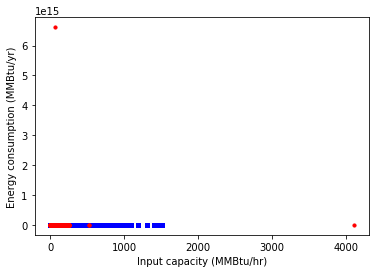

In [24]:
"""
capacity versus energy consumption (MMBtu)
remove the input heat capacity unit is "other"
"""
fig = plt.figure()
ax1 = fig.add_subplot(111)

f18 = f17.loc[(f17['IND_UNIT_HEATINPUTCAPACITY_UOM'] == 'mmBtu/hr')|(f17['AGGR_HIGH_HEAT_CAPACITY_UOM'] == 'mmBtu/hr')]
ax1.scatter(f18['IND_UNIT_HEAT_INPUT_CAPACITY'],f18['ENERGY_COM'],s=10, c='b', marker="s", label='Input heat capacity')
ax1.scatter(f18['AGGR_HIGH_HEAT_CAPACITY'],f18['ENERGY_COM'],s=10, c='r', marker="o", label='Aggregated heat capacity')

plt.xlabel('Input capacity (MMBtu/hr)')
plt.ylabel('Energy consumption (MMBtu/yr)')
plt.show()

In [25]:
f17.to_excel(r'C:\Users\zhang\Box\Boiler electrification potential\Tier_2_cleaned.xlsx', index = False)

In [26]:
# unit conversion when the unit of IND_UNIT_HEATINPUTCAPACITY_UOM is not mmBtu/hr, for agg_unit_uom, they are all mmBtu/hr
Unit_other = pd.read_excel(r'C:\Users\zhang\Box\Boiler electrification potential\Unit_other_tier2_cleaned.xlsx')

In [27]:
Unit_other['IND_UNIT_HEATCAPACITY_UOM_OTHR'] = Unit_other['IND_UNIT_HEATCAPACITY_UOM_OTHR'].astype(str)
Unit_other_z1 = Unit_other.set_index('IND_UNIT_HEATCAPACITY_UOM_OTHR')['Distillate Fuel Oil No. 1'].to_dict() 
Unit_other_z2 = Unit_other.set_index('IND_UNIT_HEATCAPACITY_UOM_OTHR')['Distillate Fuel Oil No. 2'].to_dict()
Unit_other_z23 = Unit_other.set_index('IND_UNIT_HEATCAPACITY_UOM_OTHR')['Special Naphtha'].to_dict()
Unit_other_z37 = Unit_other.set_index('IND_UNIT_HEATCAPACITY_UOM_OTHR')['Natural Gas (Weighted U.S. Average)'].to_dict()
Unit_other_z9 = Unit_other.set_index('IND_UNIT_HEATCAPACITY_UOM_OTHR')['Propane'].to_dict()
Unit_other_z44 = Unit_other.set_index('IND_UNIT_HEATCAPACITY_UOM_OTHR')['Biogas (Captured methane)'].to_dict()
Unit_other_z47 = Unit_other.set_index('IND_UNIT_HEATCAPACITY_UOM_OTHR')['Subbituminous'].to_dict()
Unit_other_z49 = Unit_other.set_index('IND_UNIT_HEATCAPACITY_UOM_OTHR')['Coke'].to_dict()
Unit_other_z55 = Unit_other.set_index('IND_UNIT_HEATCAPACITY_UOM_OTHR')['MWC (Municipal waste combustor)'].to_dict()
Unit_other_z63 = Unit_other.set_index('IND_UNIT_HEATCAPACITY_UOM_OTHR')['Coke'].to_dict()

In [28]:
#groupby fuel type and plot
f17_z1 = f17.loc[f17['FUEL_TYPE'] == z1]
f17_z2 = f17.loc[f17['FUEL_TYPE'] == z2]
f17_z3 = f17.loc[f17['FUEL_TYPE'] == z3]
f17_z4 = f17.loc[f17['FUEL_TYPE'] == z4]
f17_z5 = f17.loc[f17['FUEL_TYPE'] == z5]
f17_z6 = f17.loc[f17['FUEL_TYPE'] == z6]
f17_z7 = f17.loc[f17['FUEL_TYPE'] == z7]
f17_z8 = f17.loc[f17['FUEL_TYPE'] == z8]
f17_z9 = f17.loc[f17['FUEL_TYPE'] == z9]
f17_z10 = f17.loc[f17['FUEL_TYPE'] == z10]
f17_z11 = f17.loc[f17['FUEL_TYPE'] == z11]
f17_z12 = f17.loc[f17['FUEL_TYPE'] == z12]
f17_z13 = f17.loc[f17['FUEL_TYPE'] == z13]
f17_z14 = f17.loc[f17['FUEL_TYPE'] == z14]
f17_z15 = f17.loc[f17['FUEL_TYPE'] == z15]
f17_z16 = f17.loc[f17['FUEL_TYPE'] == z16]
f17_z17 = f17.loc[f17['FUEL_TYPE'] == z17]
f17_z18 = f17.loc[f17['FUEL_TYPE'] == z18]
f17_z19 = f17.loc[f17['FUEL_TYPE'] == z19]
f17_z20 = f17.loc[f17['FUEL_TYPE'] == z20]
f17_z21 = f17.loc[f17['FUEL_TYPE'] == z21]
f17_z22 = f17.loc[f17['FUEL_TYPE'] == z22]
f17_z23 = f17.loc[f17['FUEL_TYPE'] == z23]
f17_z24 = f17.loc[f17['FUEL_TYPE'] == z24]
f17_z25 = f17.loc[f17['FUEL_TYPE'] == z25]
f17_z26 = f17.loc[f17['FUEL_TYPE'] == z26]
f17_z27 = f17.loc[f17['FUEL_TYPE'] == z27]
f17_z28 = f17.loc[f17['FUEL_TYPE'] == z28]
f17_z29 = f17.loc[f17['FUEL_TYPE'] == z29]
f17_z30 = f17.loc[f17['FUEL_TYPE'] == z30]
f17_z31 = f17.loc[f17['FUEL_TYPE'] == z31]
f17_z32 = f17.loc[f17['FUEL_TYPE'] == z32]
f17_z33 = f17.loc[f17['FUEL_TYPE'] == z33]
f17_z34 = f17.loc[f17['FUEL_TYPE'] == z34]
f17_z35 = f17.loc[f17['FUEL_TYPE'] == z35]
f17_z36 = f17.loc[f17['FUEL_TYPE'] == z36]
f17_z37 = f17.loc[f17['FUEL_TYPE'] == z37]
f17_z38 = f17.loc[f17['FUEL_TYPE'] == z38]
f17_z39 = f17.loc[f17['FUEL_TYPE'] == z39]
f17_z40 = f17.loc[f17['FUEL_TYPE'] == z40]
f17_z41 = f17.loc[f17['FUEL_TYPE'] == z41]
f17_z42 = f17.loc[f17['FUEL_TYPE'] == z42]
f17_z43 = f17.loc[f17['FUEL_TYPE'] == z43]
f17_z44 = f17.loc[f17['FUEL_TYPE'] == z44]
f17_z45 = f17.loc[f17['FUEL_TYPE'] == z45]
f17_z46 = f17.loc[f17['FUEL_TYPE'] == z46]
f17_z47 = f17.loc[f17['FUEL_TYPE'] == z47]
f17_z48 = f17.loc[f17['FUEL_TYPE'] == z48]
f17_z49 = f17.loc[f17['FUEL_TYPE'] == z49]
f17_z50 = f17.loc[f17['FUEL_TYPE'] == z50]
f17_z51 = f17.loc[f17['FUEL_TYPE'] == z51]
f17_z52 = f17.loc[f17['FUEL_TYPE'] == z52]
f17_z53 = f17.loc[f17['FUEL_TYPE'] == z53]
f17_z54 = f17.loc[f17['FUEL_TYPE'] == z54]
f17_z55 = f17.loc[f17['FUEL_TYPE'] == z55]
f17_z56 = f17.loc[f17['FUEL_TYPE'] == z56]
f17_z57 = f17.loc[f17['FUEL_TYPE'] == z57]
f17_z58 = f17.loc[f17['FUEL_TYPE'] == z58]
f17_z59 = f17.loc[f17['FUEL_TYPE'] == z59]
f17_z60 = f17.loc[f17['FUEL_TYPE'] == z60]
f17_z61 = f17.loc[f17['FUEL_TYPE'] == z61]
f17_z62 = f17.loc[f17['FUEL_TYPE'] == z62]
f17_z63 = f17.loc[f17['FUEL_TYPE'] == z63]

In [29]:
# rearrange the unit: select the entries which input heat capacit and aggregated high heat capacity are with unit of mmBtu/hr
f17_z1_mmBtu = f17_z1.loc[(f17_z1['IND_UNIT_HEATINPUTCAPACITY_UOM'] == 'mmBtu/hr')|(f17_z1['AGGR_HIGH_HEAT_CAPACITY_UOM'] == 'mmBtu/hr')]
f17_z2_mmBtu = f17_z2.loc[(f17_z2['IND_UNIT_HEATINPUTCAPACITY_UOM'] == 'mmBtu/hr')|(f17_z2['AGGR_HIGH_HEAT_CAPACITY_UOM'] == 'mmBtu/hr')]
f17_z3_mmBtu = f17_z3.loc[(f17_z3['IND_UNIT_HEATINPUTCAPACITY_UOM'] == 'mmBtu/hr')|(f17_z3['AGGR_HIGH_HEAT_CAPACITY_UOM'] == 'mmBtu/hr')]
f17_z4_mmBtu = f17_z4.loc[(f17_z4['IND_UNIT_HEATINPUTCAPACITY_UOM'] == 'mmBtu/hr')|(f17_z4['AGGR_HIGH_HEAT_CAPACITY_UOM'] == 'mmBtu/hr')]
f17_z5_mmBtu = f17_z5.loc[(f17_z5['IND_UNIT_HEATINPUTCAPACITY_UOM'] == 'mmBtu/hr')|(f17_z5['AGGR_HIGH_HEAT_CAPACITY_UOM'] == 'mmBtu/hr')]
f17_z6_mmBtu = f17_z6.loc[(f17_z6['IND_UNIT_HEATINPUTCAPACITY_UOM'] == 'mmBtu/hr')|(f17_z6['AGGR_HIGH_HEAT_CAPACITY_UOM'] == 'mmBtu/hr')]
f17_z7_mmBtu = f17_z7.loc[(f17_z7['IND_UNIT_HEATINPUTCAPACITY_UOM'] == 'mmBtu/hr')|(f17_z7['AGGR_HIGH_HEAT_CAPACITY_UOM'] == 'mmBtu/hr')]
f17_z8_mmBtu = f17_z8.loc[(f17_z8['IND_UNIT_HEATINPUTCAPACITY_UOM'] == 'mmBtu/hr')|(f17_z8['AGGR_HIGH_HEAT_CAPACITY_UOM'] == 'mmBtu/hr')]
f17_z9_mmBtu = f17_z9.loc[(f17_z9['IND_UNIT_HEATINPUTCAPACITY_UOM'] == 'mmBtu/hr')|(f17_z9['AGGR_HIGH_HEAT_CAPACITY_UOM'] == 'mmBtu/hr')]
f17_z10_mmBtu = f17_z10.loc[(f17_z10['IND_UNIT_HEATINPUTCAPACITY_UOM'] == 'mmBtu/hr')|(f17_z10['AGGR_HIGH_HEAT_CAPACITY_UOM'] == 'mmBtu/hr')]
f17_z11_mmBtu = f17_z11.loc[(f17_z11['IND_UNIT_HEATINPUTCAPACITY_UOM'] == 'mmBtu/hr')|(f17_z11['AGGR_HIGH_HEAT_CAPACITY_UOM'] == 'mmBtu/hr')]
f17_z12_mmBtu = f17_z12.loc[(f17_z12['IND_UNIT_HEATINPUTCAPACITY_UOM'] == 'mmBtu/hr')|(f17_z12['AGGR_HIGH_HEAT_CAPACITY_UOM'] == 'mmBtu/hr')]
f17_z13_mmBtu = f17_z13.loc[(f17_z13['IND_UNIT_HEATINPUTCAPACITY_UOM'] == 'mmBtu/hr')|(f17_z13['AGGR_HIGH_HEAT_CAPACITY_UOM'] == 'mmBtu/hr')]
f17_z14_mmBtu = f17_z14.loc[(f17_z14['IND_UNIT_HEATINPUTCAPACITY_UOM'] == 'mmBtu/hr')|(f17_z14['AGGR_HIGH_HEAT_CAPACITY_UOM'] == 'mmBtu/hr')]
f17_z15_mmBtu = f17_z15.loc[(f17_z15['IND_UNIT_HEATINPUTCAPACITY_UOM'] == 'mmBtu/hr')|(f17_z15['AGGR_HIGH_HEAT_CAPACITY_UOM'] == 'mmBtu/hr')]
f17_z16_mmBtu = f17_z16.loc[(f17_z16['IND_UNIT_HEATINPUTCAPACITY_UOM'] == 'mmBtu/hr')|(f17_z16['AGGR_HIGH_HEAT_CAPACITY_UOM'] == 'mmBtu/hr')]
f17_z17_mmBtu = f17_z17.loc[(f17_z17['IND_UNIT_HEATINPUTCAPACITY_UOM'] == 'mmBtu/hr')|(f17_z17['AGGR_HIGH_HEAT_CAPACITY_UOM'] == 'mmBtu/hr')]
f17_z18_mmBtu = f17_z18.loc[(f17_z18['IND_UNIT_HEATINPUTCAPACITY_UOM'] == 'mmBtu/hr')|(f17_z18['AGGR_HIGH_HEAT_CAPACITY_UOM'] == 'mmBtu/hr')]
f17_z19_mmBtu = f17_z19.loc[(f17_z19['IND_UNIT_HEATINPUTCAPACITY_UOM'] == 'mmBtu/hr')|(f17_z19['AGGR_HIGH_HEAT_CAPACITY_UOM'] == 'mmBtu/hr')]
f17_z20_mmBtu = f17_z20.loc[(f17_z20['IND_UNIT_HEATINPUTCAPACITY_UOM'] == 'mmBtu/hr')|(f17_z20['AGGR_HIGH_HEAT_CAPACITY_UOM'] == 'mmBtu/hr')]
f17_z21_mmBtu = f17_z21.loc[(f17_z21['IND_UNIT_HEATINPUTCAPACITY_UOM'] == 'mmBtu/hr')|(f17_z21['AGGR_HIGH_HEAT_CAPACITY_UOM'] == 'mmBtu/hr')]
f17_z22_mmBtu = f17_z22.loc[(f17_z22['IND_UNIT_HEATINPUTCAPACITY_UOM'] == 'mmBtu/hr')|(f17_z22['AGGR_HIGH_HEAT_CAPACITY_UOM'] == 'mmBtu/hr')]
f17_z23_mmBtu = f17_z23.loc[(f17_z23['IND_UNIT_HEATINPUTCAPACITY_UOM'] == 'mmBtu/hr')|(f17_z23['AGGR_HIGH_HEAT_CAPACITY_UOM'] == 'mmBtu/hr')]
f17_z24_mmBtu = f17_z24.loc[(f17_z24['IND_UNIT_HEATINPUTCAPACITY_UOM'] == 'mmBtu/hr')|(f17_z24['AGGR_HIGH_HEAT_CAPACITY_UOM'] == 'mmBtu/hr')]
f17_z25_mmBtu = f17_z25.loc[(f17_z25['IND_UNIT_HEATINPUTCAPACITY_UOM'] == 'mmBtu/hr')|(f17_z25['AGGR_HIGH_HEAT_CAPACITY_UOM'] == 'mmBtu/hr')]
f17_z26_mmBtu = f17_z26.loc[(f17_z26['IND_UNIT_HEATINPUTCAPACITY_UOM'] == 'mmBtu/hr')|(f17_z26['AGGR_HIGH_HEAT_CAPACITY_UOM'] == 'mmBtu/hr')]
f17_z27_mmBtu = f17_z27.loc[(f17_z27['IND_UNIT_HEATINPUTCAPACITY_UOM'] == 'mmBtu/hr')|(f17_z27['AGGR_HIGH_HEAT_CAPACITY_UOM'] == 'mmBtu/hr')]
f17_z28_mmBtu = f17_z28.loc[(f17_z28['IND_UNIT_HEATINPUTCAPACITY_UOM'] == 'mmBtu/hr')|(f17_z28['AGGR_HIGH_HEAT_CAPACITY_UOM'] == 'mmBtu/hr')]
f17_z29_mmBtu = f17_z29.loc[(f17_z29['IND_UNIT_HEATINPUTCAPACITY_UOM'] == 'mmBtu/hr')|(f17_z29['AGGR_HIGH_HEAT_CAPACITY_UOM'] == 'mmBtu/hr')]
f17_z30_mmBtu = f17_z30.loc[(f17_z30['IND_UNIT_HEATINPUTCAPACITY_UOM'] == 'mmBtu/hr')|(f17_z30['AGGR_HIGH_HEAT_CAPACITY_UOM'] == 'mmBtu/hr')]
f17_z31_mmBtu = f17_z31.loc[(f17_z31['IND_UNIT_HEATINPUTCAPACITY_UOM'] == 'mmBtu/hr')|(f17_z31['AGGR_HIGH_HEAT_CAPACITY_UOM'] == 'mmBtu/hr')]
f17_z32_mmBtu = f17_z32.loc[(f17_z32['IND_UNIT_HEATINPUTCAPACITY_UOM'] == 'mmBtu/hr')|(f17_z32['AGGR_HIGH_HEAT_CAPACITY_UOM'] == 'mmBtu/hr')]
f17_z33_mmBtu = f17_z33.loc[(f17_z33['IND_UNIT_HEATINPUTCAPACITY_UOM'] == 'mmBtu/hr')|(f17_z33['AGGR_HIGH_HEAT_CAPACITY_UOM'] == 'mmBtu/hr')]
f17_z34_mmBtu = f17_z34.loc[(f17_z34['IND_UNIT_HEATINPUTCAPACITY_UOM'] == 'mmBtu/hr')|(f17_z34['AGGR_HIGH_HEAT_CAPACITY_UOM'] == 'mmBtu/hr')]
f17_z35_mmBtu = f17_z35.loc[(f17_z35['IND_UNIT_HEATINPUTCAPACITY_UOM'] == 'mmBtu/hr')|(f17_z35['AGGR_HIGH_HEAT_CAPACITY_UOM'] == 'mmBtu/hr')]
f17_z36_mmBtu = f17_z36.loc[(f17_z36['IND_UNIT_HEATINPUTCAPACITY_UOM'] == 'mmBtu/hr')|(f17_z36['AGGR_HIGH_HEAT_CAPACITY_UOM'] == 'mmBtu/hr')]
f17_z37_mmBtu = f17_z37.loc[(f17_z37['IND_UNIT_HEATINPUTCAPACITY_UOM'] == 'mmBtu/hr')|(f17_z37['AGGR_HIGH_HEAT_CAPACITY_UOM'] == 'mmBtu/hr')]
f17_z38_mmBtu = f17_z38.loc[(f17_z38['IND_UNIT_HEATINPUTCAPACITY_UOM'] == 'mmBtu/hr')|(f17_z38['AGGR_HIGH_HEAT_CAPACITY_UOM'] == 'mmBtu/hr')]
f17_z39_mmBtu = f17_z39.loc[(f17_z39['IND_UNIT_HEATINPUTCAPACITY_UOM'] == 'mmBtu/hr')|(f17_z39['AGGR_HIGH_HEAT_CAPACITY_UOM'] == 'mmBtu/hr')]
f17_z40_mmBtu = f17_z40.loc[(f17_z40['IND_UNIT_HEATINPUTCAPACITY_UOM'] == 'mmBtu/hr')|(f17_z40['AGGR_HIGH_HEAT_CAPACITY_UOM'] == 'mmBtu/hr')]
f17_z41_mmBtu = f17_z41.loc[(f17_z41['IND_UNIT_HEATINPUTCAPACITY_UOM'] == 'mmBtu/hr')|(f17_z41['AGGR_HIGH_HEAT_CAPACITY_UOM'] == 'mmBtu/hr')]
f17_z42_mmBtu = f17_z42.loc[(f17_z42['IND_UNIT_HEATINPUTCAPACITY_UOM'] == 'mmBtu/hr')|(f17_z42['AGGR_HIGH_HEAT_CAPACITY_UOM'] == 'mmBtu/hr')]
f17_z43_mmBtu = f17_z43.loc[(f17_z43['IND_UNIT_HEATINPUTCAPACITY_UOM'] == 'mmBtu/hr')|(f17_z43['AGGR_HIGH_HEAT_CAPACITY_UOM'] == 'mmBtu/hr')]
f17_z44_mmBtu = f17_z44.loc[(f17_z44['IND_UNIT_HEATINPUTCAPACITY_UOM'] == 'mmBtu/hr')|(f17_z44['AGGR_HIGH_HEAT_CAPACITY_UOM'] == 'mmBtu/hr')]
f17_z45_mmBtu = f17_z45.loc[(f17_z45['IND_UNIT_HEATINPUTCAPACITY_UOM'] == 'mmBtu/hr')|(f17_z45['AGGR_HIGH_HEAT_CAPACITY_UOM'] == 'mmBtu/hr')]
f17_z46_mmBtu = f17_z46.loc[(f17_z46['IND_UNIT_HEATINPUTCAPACITY_UOM'] == 'mmBtu/hr')|(f17_z46['AGGR_HIGH_HEAT_CAPACITY_UOM'] == 'mmBtu/hr')]
f17_z47_mmBtu = f17_z47.loc[(f17_z47['IND_UNIT_HEATINPUTCAPACITY_UOM'] == 'mmBtu/hr')|(f17_z47['AGGR_HIGH_HEAT_CAPACITY_UOM'] == 'mmBtu/hr')]
f17_z48_mmBtu = f17_z48.loc[(f17_z48['IND_UNIT_HEATINPUTCAPACITY_UOM'] == 'mmBtu/hr')|(f17_z48['AGGR_HIGH_HEAT_CAPACITY_UOM'] == 'mmBtu/hr')]
f17_z49_mmBtu = f17_z49.loc[(f17_z49['IND_UNIT_HEATINPUTCAPACITY_UOM'] == 'mmBtu/hr')|(f17_z49['AGGR_HIGH_HEAT_CAPACITY_UOM'] == 'mmBtu/hr')]
f17_z50_mmBtu = f17_z50.loc[(f17_z50['IND_UNIT_HEATINPUTCAPACITY_UOM'] == 'mmBtu/hr')|(f17_z50['AGGR_HIGH_HEAT_CAPACITY_UOM'] == 'mmBtu/hr')]
f17_z51_mmBtu = f17_z51.loc[(f17_z51['IND_UNIT_HEATINPUTCAPACITY_UOM'] == 'mmBtu/hr')|(f17_z51['AGGR_HIGH_HEAT_CAPACITY_UOM'] == 'mmBtu/hr')]
f17_z52_mmBtu = f17_z52.loc[(f17_z52['IND_UNIT_HEATINPUTCAPACITY_UOM'] == 'mmBtu/hr')|(f17_z52['AGGR_HIGH_HEAT_CAPACITY_UOM'] == 'mmBtu/hr')]
f17_z53_mmBtu = f17_z53.loc[(f17_z53['IND_UNIT_HEATINPUTCAPACITY_UOM'] == 'mmBtu/hr')|(f17_z53['AGGR_HIGH_HEAT_CAPACITY_UOM'] == 'mmBtu/hr')]
f17_z54_mmBtu = f17_z54.loc[(f17_z54['IND_UNIT_HEATINPUTCAPACITY_UOM'] == 'mmBtu/hr')|(f17_z54['AGGR_HIGH_HEAT_CAPACITY_UOM'] == 'mmBtu/hr')]
f17_z55_mmBtu = f17_z55.loc[(f17_z55['IND_UNIT_HEATINPUTCAPACITY_UOM'] == 'mmBtu/hr')|(f17_z55['AGGR_HIGH_HEAT_CAPACITY_UOM'] == 'mmBtu/hr')]
f17_z56_mmBtu = f17_z56.loc[(f17_z56['IND_UNIT_HEATINPUTCAPACITY_UOM'] == 'mmBtu/hr')|(f17_z56['AGGR_HIGH_HEAT_CAPACITY_UOM'] == 'mmBtu/hr')]
f17_z57_mmBtu = f17_z57.loc[(f17_z57['IND_UNIT_HEATINPUTCAPACITY_UOM'] == 'mmBtu/hr')|(f17_z57['AGGR_HIGH_HEAT_CAPACITY_UOM'] == 'mmBtu/hr')]
f17_z58_mmBtu = f17_z58.loc[(f17_z58['IND_UNIT_HEATINPUTCAPACITY_UOM'] == 'mmBtu/hr')|(f17_z58['AGGR_HIGH_HEAT_CAPACITY_UOM'] == 'mmBtu/hr')]
f17_z59_mmBtu = f17_z59.loc[(f17_z59['IND_UNIT_HEATINPUTCAPACITY_UOM'] == 'mmBtu/hr')|(f17_z59['AGGR_HIGH_HEAT_CAPACITY_UOM'] == 'mmBtu/hr')]
f17_z60_mmBtu = f17_z60.loc[(f17_z60['IND_UNIT_HEATINPUTCAPACITY_UOM'] == 'mmBtu/hr')|(f17_z60['AGGR_HIGH_HEAT_CAPACITY_UOM'] == 'mmBtu/hr')]
f17_z61_mmBtu = f17_z61.loc[(f17_z61['IND_UNIT_HEATINPUTCAPACITY_UOM'] == 'mmBtu/hr')|(f17_z61['AGGR_HIGH_HEAT_CAPACITY_UOM'] == 'mmBtu/hr')]
f17_z62_mmBtu = f17_z62.loc[(f17_z62['IND_UNIT_HEATINPUTCAPACITY_UOM'] == 'mmBtu/hr')|(f17_z62['AGGR_HIGH_HEAT_CAPACITY_UOM'] == 'mmBtu/hr')]
f17_z63_mmBtu = f17_z63.loc[(f17_z63['IND_UNIT_HEATINPUTCAPACITY_UOM'] == 'mmBtu/hr')|(f17_z63['AGGR_HIGH_HEAT_CAPACITY_UOM'] == 'mmBtu/hr')]


In [30]:
# convert other unit to mmBtu/hr
f17_z1_other = f17_z1.loc[(f17_z1['IND_UNIT_HEATINPUTCAPACITY_UOM'] == 'Other')]
f17_z1_other.loc[:,('IND_UNIT_HEAT_INPUT_CAPACITY')] = f17_z1_other.apply(lambda x: x[('IND_UNIT_HEAT_INPUT_CAPACITY')]*Unit_other_z1.get(x['IND_UNIT_HEATCAPACITY_UOM_OTHR'],0), axis = 1) #units are mmBtu

f17_z2_other = f17_z2.loc[(f17_z2['IND_UNIT_HEATINPUTCAPACITY_UOM'] == 'Other')]
f17_z2_other.loc[:,('IND_UNIT_HEAT_INPUT_CAPACITY')] = f17_z2_other.apply(lambda x: x[('IND_UNIT_HEAT_INPUT_CAPACITY')]*Unit_other_z2.get(x['IND_UNIT_HEATCAPACITY_UOM_OTHR'],0), axis = 1) #Units are mmBtu

f17_z9_other = f17_z9.loc[(f17_z9['IND_UNIT_HEATINPUTCAPACITY_UOM'] == 'Other')]
f17_z9_other.loc[:,('IND_UNIT_HEAT_INPUT_CAPACITY')] = f17_z9_other.apply(lambda x: x[('IND_UNIT_HEAT_INPUT_CAPACITY')]*Unit_other_z9.get(x['IND_UNIT_HEATCAPACITY_UOM_OTHR'],0), axis = 1) #Units are mmBtu

f17_z23_other = f17_z23.loc[(f17_z23['IND_UNIT_HEATINPUTCAPACITY_UOM'] == 'Other')]
f17_z23_other.loc[:,('IND_UNIT_HEAT_INPUT_CAPACITY')] = f17_z23_other.apply(lambda x: x[('IND_UNIT_HEAT_INPUT_CAPACITY')]*Unit_other_z23.get(x['IND_UNIT_HEATCAPACITY_UOM_OTHR'],0), axis = 1) #Units are mmBtu

f17_z37_other = f17_z37.loc[(f17_z37['IND_UNIT_HEATINPUTCAPACITY_UOM'] == 'Other')]
f17_z37_other.loc[:,('IND_UNIT_HEAT_INPUT_CAPACITY')] = f17_z37_other.apply(lambda x: x[('IND_UNIT_HEAT_INPUT_CAPACITY')]*Unit_other_z37.get(x['IND_UNIT_HEATCAPACITY_UOM_OTHR'],0), axis = 1) #Units are mmBtu

f17_z44_other = f17_z44.loc[(f17_z44['IND_UNIT_HEATINPUTCAPACITY_UOM'] == 'Other')]
f17_z44_other.loc[:,('IND_UNIT_HEAT_INPUT_CAPACITY')] = f17_z44_other.apply(lambda x: x[('IND_UNIT_HEAT_INPUT_CAPACITY')]*Unit_other_z44.get(x['IND_UNIT_HEATCAPACITY_UOM_OTHR'],0), axis = 1) #Units are mmBtu

f17_z47_other = f17_z47.loc[(f17_z47['IND_UNIT_HEATINPUTCAPACITY_UOM'] == 'Other')]
f17_z47_other.loc[:,('IND_UNIT_HEAT_INPUT_CAPACITY')] = f17_z47_other.apply(lambda x: x[('IND_UNIT_HEAT_INPUT_CAPACITY')]*Unit_other_z47.get(x['IND_UNIT_HEATCAPACITY_UOM_OTHR'],0), axis = 1) #Units are mmBtu

f17_z49_other = f17_z49.loc[(f17_z49['IND_UNIT_HEATINPUTCAPACITY_UOM'] == 'Other')]
f17_z49_other.loc[:,('IND_UNIT_HEAT_INPUT_CAPACITY')] = f17_z49_other.apply(lambda x: x[('IND_UNIT_HEAT_INPUT_CAPACITY')]*Unit_other_z49.get(x['IND_UNIT_HEATCAPACITY_UOM_OTHR'],0), axis = 1) #Units are mmBtu

f17_z55_other = f17_z55.loc[(f17_z55['IND_UNIT_HEATINPUTCAPACITY_UOM'] == 'Other')]
f17_z55_other.loc[:,('IND_UNIT_HEAT_INPUT_CAPACITY')] = f17_z55_other.apply(lambda x: x[('IND_UNIT_HEAT_INPUT_CAPACITY')]*Unit_other_z55.get(x['IND_UNIT_HEATCAPACITY_UOM_OTHR'],0), axis = 1) #Units are mmBtu

f17_z63_other = f17_z63.loc[(f17_z63['IND_UNIT_HEATINPUTCAPACITY_UOM'] == 'Other')]
f17_z63_other.loc[:,('IND_UNIT_HEAT_INPUT_CAPACITY')] = f17_z63_other.apply(lambda x: x[('IND_UNIT_HEAT_INPUT_CAPACITY')]*Unit_other_z63.get(x['IND_UNIT_HEATCAPACITY_UOM_OTHR'],0), axis = 1) #Units are mmBtu

In [31]:
# combine entries with mmBtu unit and other units
f17_z1_tier2 = pd.concat([f17_z1_mmBtu,f17_z1_other])
f17_z2_tier2 = pd.concat([f17_z2_mmBtu,f17_z2_other])
f17_z9_tier2 = pd.concat([f17_z9_mmBtu,f17_z9_other])
f17_z23_tier2 = pd.concat([f17_z23_mmBtu,f17_z23_other])
f17_z37_tier2 = pd.concat([f17_z37_mmBtu,f17_z37_other])
f17_z44_tier2 = pd.concat([f17_z44_mmBtu,f17_z44_other])
f17_z47_tier2 = pd.concat([f17_z47_mmBtu,f17_z47_other])
f17_z49_tier2 = pd.concat([f17_z49_mmBtu,f17_z49_other])
f17_z55_tier2 = pd.concat([f17_z55_mmBtu,f17_z55_other])
f17_z63_tier2 = pd.concat([f17_z63_mmBtu,f17_z63_other])

In [32]:
# in order to find valid entries, we compare energy consumption (mmbtu/hr) with heat capacity (mmbtu/hr)
f17_z1_tier2.loc[:,'ENERGY_MMBtu_hr'] = f17_z1_tier2.loc[:,'ENERGY_COM']/365/24
f17_z2_tier2.loc[:,'ENERGY_MMBtu_hr'] = f17_z2_tier2.loc[:,'ENERGY_COM']/365/24
f17_z3.loc[:,'ENERGY_MMBtu_hr'] = f17_z3.loc[:,'ENERGY_COM']/365/24
f17_z4.loc[:,'ENERGY_MMBtu_hr'] = f17_z4.loc[:,'ENERGY_COM']/365/24
f17_z5.loc[:,'ENERGY_MMBtu_hr'] = f17_z5.loc[:,'ENERGY_COM']/365/24
f17_z6.loc[:,'ENERGY_MMBtu_hr'] = f17_z6.loc[:,'ENERGY_COM']/365/24
f17_z7.loc[:,'ENERGY_MMBtu_hr'] = f17_z7.loc[:,'ENERGY_COM']/365/24
f17_z8.loc[:,'ENERGY_MMBtu_hr'] = f17_z8.loc[:,'ENERGY_COM']/365/24
f17_z9_tier2.loc[:,'ENERGY_MMBtu_hr'] = f17_z9_tier2.loc[:,'ENERGY_COM']/365/24
f17_z10.loc[:,'ENERGY_MMBtu_hr'] = f17_z10.loc[:,'ENERGY_COM']/365/24
f17_z11.loc[:,'ENERGY_MMBtu_hr'] = f17_z11.loc[:,'ENERGY_COM']/365/24
f17_z12.loc[:,'ENERGY_MMBtu_hr'] = f17_z12.loc[:,'ENERGY_COM']/365/24
f17_z13.loc[:,'ENERGY_MMBtu_hr'] = f17_z13.loc[:,'ENERGY_COM']/365/24
f17_z14.loc[:,'ENERGY_MMBtu_hr'] = f17_z14.loc[:,'ENERGY_COM']/365/24
f17_z15.loc[:,'ENERGY_MMBtu_hr'] = f17_z15.loc[:,'ENERGY_COM']/365/24
f17_z16.loc[:,'ENERGY_MMBtu_hr'] = f17_z16.loc[:,'ENERGY_COM']/365/24
f17_z17.loc[:,'ENERGY_MMBtu_hr'] = f17_z17.loc[:,'ENERGY_COM']/365/24
f17_z18.loc[:,'ENERGY_MMBtu_hr'] = f17_z18.loc[:,'ENERGY_COM']/365/24
f17_z19.loc[:,'ENERGY_MMBtu_hr'] = f17_z19.loc[:,'ENERGY_COM']/365/24
f17_z20.loc[:,'ENERGY_MMBtu_hr'] = f17_z20.loc[:,'ENERGY_COM']/365/24
f17_z21.loc[:,'ENERGY_MMBtu_hr'] = f17_z21.loc[:,'ENERGY_COM']/365/24
f17_z22.loc[:,'ENERGY_MMBtu_hr'] = f17_z22.loc[:,'ENERGY_COM']/365/24
f17_z23_tier2.loc[:,'ENERGY_MMBtu_hr'] = f17_z23_tier2.loc[:,'ENERGY_COM']/365/24
f17_z24.loc[:,'ENERGY_MMBtu_hr'] = f17_z24.loc[:,'ENERGY_COM']/365/24
f17_z25.loc[:,'ENERGY_MMBtu_hr'] = f17_z25.loc[:,'ENERGY_COM']/365/24
f17_z26.loc[:,'ENERGY_MMBtu_hr'] = f17_z26.loc[:,'ENERGY_COM']/365/24
f17_z27.loc[:,'ENERGY_MMBtu_hr'] = f17_z27.loc[:,'ENERGY_COM']/365/24
f17_z28.loc[:,'ENERGY_MMBtu_hr'] = f17_z28.loc[:,'ENERGY_COM']/365/24
f17_z29.loc[:,'ENERGY_MMBtu_hr'] = f17_z29.loc[:,'ENERGY_COM']/365/24
f17_z30.loc[:,'ENERGY_MMBtu_hr'] = f17_z30.loc[:,'ENERGY_COM']/365/24
f17_z31.loc[:,'ENERGY_MMBtu_hr'] = f17_z31.loc[:,'ENERGY_COM']/365/24
f17_z32.loc[:,'ENERGY_MMBtu_hr'] = f17_z32.loc[:,'ENERGY_COM']/365/24
f17_z33.loc[:,'ENERGY_MMBtu_hr'] = f17_z33.loc[:,'ENERGY_COM']/365/24
f17_z34.loc[:,'ENERGY_MMBtu_hr'] = f17_z34.loc[:,'ENERGY_COM']/365/24
f17_z35.loc[:,'ENERGY_MMBtu_hr'] = f17_z35.loc[:,'ENERGY_COM']/365/24
f17_z36.loc[:,'ENERGY_MMBtu_hr'] = f17_z36.loc[:,'ENERGY_COM']/365/24
f17_z37_tier2.loc[:,'ENERGY_MMBtu_hr'] = f17_z37_tier2.loc[:,'ENERGY_COM']/365/24
f17_z38.loc[:,'ENERGY_MMBtu_hr'] = f17_z38.loc[:,'ENERGY_COM']/365/24
f17_z39.loc[:,'ENERGY_MMBtu_hr'] = f17_z39.loc[:,'ENERGY_COM']/365/24
f17_z40.loc[:,'ENERGY_MMBtu_hr'] = f17_z40.loc[:,'ENERGY_COM']/365/24
f17_z41.loc[:,'ENERGY_MMBtu_hr'] = f17_z41.loc[:,'ENERGY_COM']/365/24
f17_z42.loc[:,'ENERGY_MMBtu_hr'] = f17_z42.loc[:,'ENERGY_COM']/365/24
f17_z43.loc[:,'ENERGY_MMBtu_hr'] = f17_z43.loc[:,'ENERGY_COM']/365/24
f17_z44_tier2.loc[:,'ENERGY_MMBtu_hr'] = f17_z44_tier2.loc[:,'ENERGY_COM']/365/24
f17_z45.loc[:,'ENERGY_MMBtu_hr'] = f17_z45.loc[:,'ENERGY_COM']/365/24
f17_z46.loc[:,'ENERGY_MMBtu_hr'] = f17_z46.loc[:,'ENERGY_COM']/365/24
f17_z47_tier2.loc[:,'ENERGY_MMBtu_hr'] = f17_z47_tier2.loc[:,'ENERGY_COM']/365/24
f17_z48.loc[:,'ENERGY_MMBtu_hr'] = f17_z48.loc[:,'ENERGY_COM']/365/24
f17_z49_tier2.loc[:,'ENERGY_MMBtu_hr'] = f17_z49_tier2.loc[:,'ENERGY_COM']/365/24
f17_z50.loc[:,'ENERGY_MMBtu_hr'] = f17_z50.loc[:,'ENERGY_COM']/365/24
f17_z51.loc[:,'ENERGY_MMBtu_hr'] = f17_z51.loc[:,'ENERGY_COM']/365/24
f17_z52.loc[:,'ENERGY_MMBtu_hr'] = f17_z52.loc[:,'ENERGY_COM']/365/24
f17_z53.loc[:,'ENERGY_MMBtu_hr'] = f17_z53.loc[:,'ENERGY_COM']/365/24
f17_z54.loc[:,'ENERGY_MMBtu_hr'] = f17_z54.loc[:,'ENERGY_COM']/365/24
f17_z55_tier2.loc[:,'ENERGY_MMBtu_hr'] = f17_z55_tier2.loc[:,'ENERGY_COM']/365/24
f17_z56.loc[:,'ENERGY_MMBtu_hr'] = f17_z56.loc[:,'ENERGY_COM']/365/24
f17_z57.loc[:,'ENERGY_MMBtu_hr'] = f17_z57.loc[:,'ENERGY_COM']/365/24
f17_z58.loc[:,'ENERGY_MMBtu_hr'] = f17_z58.loc[:,'ENERGY_COM']/365/24
f17_z59.loc[:,'ENERGY_MMBtu_hr'] = f17_z59.loc[:,'ENERGY_COM']/365/24
f17_z60.loc[:,'ENERGY_MMBtu_hr'] = f17_z60.loc[:,'ENERGY_COM']/365/24
f17_z61.loc[:,'ENERGY_MMBtu_hr'] = f17_z61.loc[:,'ENERGY_COM']/365/24
f17_z62.loc[:,'ENERGY_MMBtu_hr'] = f17_z62.loc[:,'ENERGY_COM']/365/24
f17_z63_tier2.loc[:,'ENERGY_MMBtu_hr'] = f17_z63_tier2.loc[:,'ENERGY_COM']/365/24

In [33]:
#select the entries which the capacity is greater or equal to energy consumption (drop the entries which energy consumption > capacity)
f17_z1_tier2 = f17_z1_tier2[(f17_z1_tier2['ENERGY_MMBtu_hr']<=f17_z1_tier2['AGGR_HIGH_HEAT_CAPACITY'])|(f17_z1_tier2['ENERGY_MMBtu_hr']<=f17_z1_tier2['IND_UNIT_HEAT_INPUT_CAPACITY'])]
f17_z2_tier2 = f17_z2_tier2[(f17_z2_tier2['ENERGY_MMBtu_hr']<=f17_z2_tier2['AGGR_HIGH_HEAT_CAPACITY'])|(f17_z2_tier2['ENERGY_MMBtu_hr']<=f17_z2_tier2['IND_UNIT_HEAT_INPUT_CAPACITY'])]
f17_z3 = f17_z3[(f17_z3['ENERGY_MMBtu_hr']<=f17_z3['AGGR_HIGH_HEAT_CAPACITY'])|(f17_z3['ENERGY_MMBtu_hr']<=f17_z3['IND_UNIT_HEAT_INPUT_CAPACITY'])]
f17_z4 = f17_z4[(f17_z4['ENERGY_MMBtu_hr']<=f17_z4['AGGR_HIGH_HEAT_CAPACITY'])|(f17_z4['ENERGY_MMBtu_hr']<=f17_z4['IND_UNIT_HEAT_INPUT_CAPACITY'])]
f17_z5 = f17_z5[(f17_z5['ENERGY_MMBtu_hr']<=f17_z5['AGGR_HIGH_HEAT_CAPACITY'])|(f17_z5['ENERGY_MMBtu_hr']<=f17_z5['IND_UNIT_HEAT_INPUT_CAPACITY'])]
f17_z6 = f17_z6[(f17_z6['ENERGY_MMBtu_hr']<=f17_z6['AGGR_HIGH_HEAT_CAPACITY'])|(f17_z6['ENERGY_MMBtu_hr']<=f17_z6['IND_UNIT_HEAT_INPUT_CAPACITY'])]
f17_z7 = f17_z7[(f17_z7['ENERGY_MMBtu_hr']<=f17_z7['AGGR_HIGH_HEAT_CAPACITY'])|(f17_z7['ENERGY_MMBtu_hr']<=f17_z7['IND_UNIT_HEAT_INPUT_CAPACITY'])]
f17_z8 = f17_z8[(f17_z8['ENERGY_MMBtu_hr']<=f17_z8['AGGR_HIGH_HEAT_CAPACITY'])|(f17_z8['ENERGY_MMBtu_hr']<=f17_z8['IND_UNIT_HEAT_INPUT_CAPACITY'])]
f17_z9_tier2 = f17_z9_tier2[(f17_z9_tier2['ENERGY_MMBtu_hr']<=f17_z9_tier2['AGGR_HIGH_HEAT_CAPACITY'])|(f17_z9_tier2['ENERGY_MMBtu_hr']<=f17_z9_tier2['IND_UNIT_HEAT_INPUT_CAPACITY'])]
f17_z10 = f17_z10[(f17_z10['ENERGY_MMBtu_hr']<=f17_z10['AGGR_HIGH_HEAT_CAPACITY'])|(f17_z10['ENERGY_MMBtu_hr']<=f17_z10['IND_UNIT_HEAT_INPUT_CAPACITY'])]
f17_z11 = f17_z11[(f17_z11['ENERGY_MMBtu_hr']<=f17_z11['AGGR_HIGH_HEAT_CAPACITY'])|(f17_z11['ENERGY_MMBtu_hr']<=f17_z11['IND_UNIT_HEAT_INPUT_CAPACITY'])]
f17_z12 = f17_z12[(f17_z12['ENERGY_MMBtu_hr']<=f17_z12['AGGR_HIGH_HEAT_CAPACITY'])|(f17_z12['ENERGY_MMBtu_hr']<=f17_z12['IND_UNIT_HEAT_INPUT_CAPACITY'])]
f17_z13 = f17_z13[(f17_z13['ENERGY_MMBtu_hr']<=f17_z13['AGGR_HIGH_HEAT_CAPACITY'])|(f17_z13['ENERGY_MMBtu_hr']<=f17_z13['IND_UNIT_HEAT_INPUT_CAPACITY'])]
f17_z14 = f17_z14[(f17_z14['ENERGY_MMBtu_hr']<=f17_z14['AGGR_HIGH_HEAT_CAPACITY'])|(f17_z14['ENERGY_MMBtu_hr']<=f17_z14['IND_UNIT_HEAT_INPUT_CAPACITY'])]
f17_z15 = f17_z15[(f17_z15['ENERGY_MMBtu_hr']<=f17_z15['AGGR_HIGH_HEAT_CAPACITY'])|(f17_z15['ENERGY_MMBtu_hr']<=f17_z15['IND_UNIT_HEAT_INPUT_CAPACITY'])]
f17_z16 = f17_z16[(f17_z16['ENERGY_MMBtu_hr']<=f17_z16['AGGR_HIGH_HEAT_CAPACITY'])|(f17_z16['ENERGY_MMBtu_hr']<=f17_z16['IND_UNIT_HEAT_INPUT_CAPACITY'])]
f17_z17 = f17_z17[(f17_z17['ENERGY_MMBtu_hr']<=f17_z17['AGGR_HIGH_HEAT_CAPACITY'])|(f17_z17['ENERGY_MMBtu_hr']<=f17_z17['IND_UNIT_HEAT_INPUT_CAPACITY'])]
f17_z18 = f17_z18[(f17_z18['ENERGY_MMBtu_hr']<=f17_z18['AGGR_HIGH_HEAT_CAPACITY'])|(f17_z18['ENERGY_MMBtu_hr']<=f17_z18['IND_UNIT_HEAT_INPUT_CAPACITY'])]
f17_z19 = f17_z19[(f17_z19['ENERGY_MMBtu_hr']<=f17_z19['AGGR_HIGH_HEAT_CAPACITY'])|(f17_z19['ENERGY_MMBtu_hr']<=f17_z19['IND_UNIT_HEAT_INPUT_CAPACITY'])]
f17_z20 = f17_z20[(f17_z20['ENERGY_MMBtu_hr']<=f17_z20['AGGR_HIGH_HEAT_CAPACITY'])|(f17_z20['ENERGY_MMBtu_hr']<=f17_z20['IND_UNIT_HEAT_INPUT_CAPACITY'])]
f17_z21 = f17_z21[(f17_z21['ENERGY_MMBtu_hr']<=f17_z21['AGGR_HIGH_HEAT_CAPACITY'])|(f17_z21['ENERGY_MMBtu_hr']<=f17_z21['IND_UNIT_HEAT_INPUT_CAPACITY'])]
f17_z22 = f17_z22[(f17_z22['ENERGY_MMBtu_hr']<=f17_z22['AGGR_HIGH_HEAT_CAPACITY'])|(f17_z22['ENERGY_MMBtu_hr']<=f17_z22['IND_UNIT_HEAT_INPUT_CAPACITY'])]
f17_z23_tier2 = f17_z23_tier2[(f17_z23_tier2['ENERGY_MMBtu_hr']<=f17_z23_tier2['AGGR_HIGH_HEAT_CAPACITY'])|(f17_z23_tier2['ENERGY_MMBtu_hr']<=f17_z23_tier2['IND_UNIT_HEAT_INPUT_CAPACITY'])]
f17_z24 = f17_z24[(f17_z24['ENERGY_MMBtu_hr']<=f17_z24['AGGR_HIGH_HEAT_CAPACITY'])|(f17_z24['ENERGY_MMBtu_hr']<=f17_z24['IND_UNIT_HEAT_INPUT_CAPACITY'])]
f17_z25 = f17_z25[(f17_z25['ENERGY_MMBtu_hr']<=f17_z25['AGGR_HIGH_HEAT_CAPACITY'])|(f17_z25['ENERGY_MMBtu_hr']<=f17_z25['IND_UNIT_HEAT_INPUT_CAPACITY'])]
f17_z26 = f17_z26[(f17_z26['ENERGY_MMBtu_hr']<=f17_z26['AGGR_HIGH_HEAT_CAPACITY'])|(f17_z26['ENERGY_MMBtu_hr']<=f17_z26['IND_UNIT_HEAT_INPUT_CAPACITY'])]
f17_z27 = f17_z27[(f17_z27['ENERGY_MMBtu_hr']<=f17_z27['AGGR_HIGH_HEAT_CAPACITY'])|(f17_z27['ENERGY_MMBtu_hr']<=f17_z27['IND_UNIT_HEAT_INPUT_CAPACITY'])]
f17_z28 = f17_z28[(f17_z28['ENERGY_MMBtu_hr']<=f17_z28['AGGR_HIGH_HEAT_CAPACITY'])|(f17_z28['ENERGY_MMBtu_hr']<=f17_z28['IND_UNIT_HEAT_INPUT_CAPACITY'])]
f17_z29 = f17_z29[(f17_z29['ENERGY_MMBtu_hr']<=f17_z29['AGGR_HIGH_HEAT_CAPACITY'])|(f17_z29['ENERGY_MMBtu_hr']<=f17_z29['IND_UNIT_HEAT_INPUT_CAPACITY'])]
f17_z30 = f17_z30[(f17_z30['ENERGY_MMBtu_hr']<=f17_z30['AGGR_HIGH_HEAT_CAPACITY'])|(f17_z30['ENERGY_MMBtu_hr']<=f17_z30['IND_UNIT_HEAT_INPUT_CAPACITY'])]
f17_z31 = f17_z31[(f17_z31['ENERGY_MMBtu_hr']<=f17_z31['AGGR_HIGH_HEAT_CAPACITY'])|(f17_z31['ENERGY_MMBtu_hr']<=f17_z31['IND_UNIT_HEAT_INPUT_CAPACITY'])]
f17_z32 = f17_z32[(f17_z32['ENERGY_MMBtu_hr']<=f17_z32['AGGR_HIGH_HEAT_CAPACITY'])|(f17_z32['ENERGY_MMBtu_hr']<=f17_z32['IND_UNIT_HEAT_INPUT_CAPACITY'])]
f17_z33 = f17_z33[(f17_z33['ENERGY_MMBtu_hr']<=f17_z33['AGGR_HIGH_HEAT_CAPACITY'])|(f17_z33['ENERGY_MMBtu_hr']<=f17_z33['IND_UNIT_HEAT_INPUT_CAPACITY'])]
f17_z34 = f17_z34[(f17_z34['ENERGY_MMBtu_hr']<=f17_z34['AGGR_HIGH_HEAT_CAPACITY'])|(f17_z34['ENERGY_MMBtu_hr']<=f17_z34['IND_UNIT_HEAT_INPUT_CAPACITY'])]
f17_z35 = f17_z35[(f17_z35['ENERGY_MMBtu_hr']<=f17_z35['AGGR_HIGH_HEAT_CAPACITY'])|(f17_z35['ENERGY_MMBtu_hr']<=f17_z35['IND_UNIT_HEAT_INPUT_CAPACITY'])]
f17_z36 = f17_z36[(f17_z36['ENERGY_MMBtu_hr']<=f17_z36['AGGR_HIGH_HEAT_CAPACITY'])|(f17_z36['ENERGY_MMBtu_hr']<=f17_z36['IND_UNIT_HEAT_INPUT_CAPACITY'])]
f17_z37_tier2 = f17_z37_tier2[(f17_z37_tier2['ENERGY_MMBtu_hr']<=f17_z37_tier2['AGGR_HIGH_HEAT_CAPACITY'])|(f17_z37_tier2['ENERGY_MMBtu_hr']<=f17_z37_tier2['IND_UNIT_HEAT_INPUT_CAPACITY'])]
f17_z38 = f17_z38[(f17_z38['ENERGY_MMBtu_hr']<=f17_z38['AGGR_HIGH_HEAT_CAPACITY'])|(f17_z38['ENERGY_MMBtu_hr']<=f17_z38['IND_UNIT_HEAT_INPUT_CAPACITY'])]
f17_z39 = f17_z39[(f17_z39['ENERGY_MMBtu_hr']<=f17_z39['AGGR_HIGH_HEAT_CAPACITY'])|(f17_z39['ENERGY_MMBtu_hr']<=f17_z39['IND_UNIT_HEAT_INPUT_CAPACITY'])]
f17_z40 = f17_z40[(f17_z40['ENERGY_MMBtu_hr']<=f17_z40['AGGR_HIGH_HEAT_CAPACITY'])|(f17_z40['ENERGY_MMBtu_hr']<=f17_z40['IND_UNIT_HEAT_INPUT_CAPACITY'])]
f17_z41 = f17_z41[(f17_z41['ENERGY_MMBtu_hr']<=f17_z41['AGGR_HIGH_HEAT_CAPACITY'])|(f17_z41['ENERGY_MMBtu_hr']<=f17_z41['IND_UNIT_HEAT_INPUT_CAPACITY'])]
f17_z42 = f17_z42[(f17_z42['ENERGY_MMBtu_hr']<=f17_z42['AGGR_HIGH_HEAT_CAPACITY'])|(f17_z42['ENERGY_MMBtu_hr']<=f17_z42['IND_UNIT_HEAT_INPUT_CAPACITY'])]
f17_z43 = f17_z43[(f17_z43['ENERGY_MMBtu_hr']<=f17_z43['AGGR_HIGH_HEAT_CAPACITY'])|(f17_z43['ENERGY_MMBtu_hr']<=f17_z43['IND_UNIT_HEAT_INPUT_CAPACITY'])]
f17_z44_tier2 = f17_z44_tier2[(f17_z44_tier2['ENERGY_MMBtu_hr']<=f17_z44_tier2['AGGR_HIGH_HEAT_CAPACITY'])|(f17_z44_tier2['ENERGY_MMBtu_hr']<=f17_z44_tier2['IND_UNIT_HEAT_INPUT_CAPACITY'])]
f17_z45 = f17_z45[(f17_z45['ENERGY_MMBtu_hr']<=f17_z45['AGGR_HIGH_HEAT_CAPACITY'])|(f17_z45['ENERGY_MMBtu_hr']<=f17_z45['IND_UNIT_HEAT_INPUT_CAPACITY'])]
f17_z46 = f17_z46[(f17_z46['ENERGY_MMBtu_hr']<=f17_z46['AGGR_HIGH_HEAT_CAPACITY'])|(f17_z46['ENERGY_MMBtu_hr']<=f17_z46['IND_UNIT_HEAT_INPUT_CAPACITY'])]
f17_z47_tier2 = f17_z47_tier2[(f17_z47_tier2['ENERGY_MMBtu_hr']<=f17_z47_tier2['AGGR_HIGH_HEAT_CAPACITY'])|(f17_z47_tier2['ENERGY_MMBtu_hr']<=f17_z47_tier2['IND_UNIT_HEAT_INPUT_CAPACITY'])]
f17_z48 = f17_z48[(f17_z48['ENERGY_MMBtu_hr']<=f17_z48['AGGR_HIGH_HEAT_CAPACITY'])|(f17_z48['ENERGY_MMBtu_hr']<=f17_z48['IND_UNIT_HEAT_INPUT_CAPACITY'])]
f17_z49_tier2 = f17_z49_tier2[(f17_z49_tier2['ENERGY_MMBtu_hr']<=f17_z49_tier2['AGGR_HIGH_HEAT_CAPACITY'])|(f17_z49_tier2['ENERGY_MMBtu_hr']<=f17_z49_tier2['IND_UNIT_HEAT_INPUT_CAPACITY'])]
f17_z50 = f17_z50[(f17_z50['ENERGY_MMBtu_hr']<=f17_z50['AGGR_HIGH_HEAT_CAPACITY'])|(f17_z50['ENERGY_MMBtu_hr']<=f17_z50['IND_UNIT_HEAT_INPUT_CAPACITY'])]
f17_z51 = f17_z51[(f17_z51['ENERGY_MMBtu_hr']<=f17_z51['AGGR_HIGH_HEAT_CAPACITY'])|(f17_z51['ENERGY_MMBtu_hr']<=f17_z51['IND_UNIT_HEAT_INPUT_CAPACITY'])]
f17_z52 = f17_z52[(f17_z52['ENERGY_MMBtu_hr']<=f17_z52['AGGR_HIGH_HEAT_CAPACITY'])|(f17_z52['ENERGY_MMBtu_hr']<=f17_z52['IND_UNIT_HEAT_INPUT_CAPACITY'])]
f17_z53 = f17_z53[(f17_z53['ENERGY_MMBtu_hr']<=f17_z53['AGGR_HIGH_HEAT_CAPACITY'])|(f17_z53['ENERGY_MMBtu_hr']<=f17_z53['IND_UNIT_HEAT_INPUT_CAPACITY'])]
f17_z54 = f17_z54[(f17_z54['ENERGY_MMBtu_hr']<=f17_z54['AGGR_HIGH_HEAT_CAPACITY'])|(f17_z54['ENERGY_MMBtu_hr']<=f17_z54['IND_UNIT_HEAT_INPUT_CAPACITY'])]
f17_z55_tier2 = f17_z55_tier2[(f17_z55_tier2['ENERGY_MMBtu_hr']<=f17_z55_tier2['AGGR_HIGH_HEAT_CAPACITY'])|(f17_z55_tier2['ENERGY_MMBtu_hr']<=f17_z55_tier2['IND_UNIT_HEAT_INPUT_CAPACITY'])]
f17_z56 = f17_z56[(f17_z56['ENERGY_MMBtu_hr']<=f17_z56['AGGR_HIGH_HEAT_CAPACITY'])|(f17_z56['ENERGY_MMBtu_hr']<=f17_z56['IND_UNIT_HEAT_INPUT_CAPACITY'])]
f17_z57 = f17_z57[(f17_z57['ENERGY_MMBtu_hr']<=f17_z57['AGGR_HIGH_HEAT_CAPACITY'])|(f17_z57['ENERGY_MMBtu_hr']<=f17_z57['IND_UNIT_HEAT_INPUT_CAPACITY'])]
f17_z58 = f17_z58[(f17_z58['ENERGY_MMBtu_hr']<=f17_z58['AGGR_HIGH_HEAT_CAPACITY'])|(f17_z58['ENERGY_MMBtu_hr']<=f17_z58['IND_UNIT_HEAT_INPUT_CAPACITY'])]
f17_z59 = f17_z59[(f17_z59['ENERGY_MMBtu_hr']<=f17_z59['AGGR_HIGH_HEAT_CAPACITY'])|(f17_z59['ENERGY_MMBtu_hr']<=f17_z59['IND_UNIT_HEAT_INPUT_CAPACITY'])]
f17_z60 = f17_z60[(f17_z60['ENERGY_MMBtu_hr']<=f17_z60['AGGR_HIGH_HEAT_CAPACITY'])|(f17_z60['ENERGY_MMBtu_hr']<=f17_z60['IND_UNIT_HEAT_INPUT_CAPACITY'])]
f17_z61 = f17_z61[(f17_z61['ENERGY_MMBtu_hr']<=f17_z61['AGGR_HIGH_HEAT_CAPACITY'])|(f17_z61['ENERGY_MMBtu_hr']<=f17_z61['IND_UNIT_HEAT_INPUT_CAPACITY'])]
f17_z62 = f17_z62[(f17_z62['ENERGY_MMBtu_hr']<=f17_z62['AGGR_HIGH_HEAT_CAPACITY'])|(f17_z62['ENERGY_MMBtu_hr']<=f17_z62['IND_UNIT_HEAT_INPUT_CAPACITY'])]
f17_z63_tier2 = f17_z63_tier2[(f17_z63_tier2['ENERGY_MMBtu_hr']<=f17_z63_tier2['AGGR_HIGH_HEAT_CAPACITY'])|(f17_z63_tier2['ENERGY_MMBtu_hr']<=f17_z63_tier2['IND_UNIT_HEAT_INPUT_CAPACITY'])]

In [37]:
f17_overall = pd.concat([f17_z1_tier2,f17_z2_tier2,f17_z3,f17_z4,f17_z5,f17_z6,f17_z7,f17_z8,f17_z9_tier2,f17_z10,f17_z11,f17_z12,f17_z13,f17_z14,f17_z15,f17_z16,f17_z17,f17_z18,f17_z19,f17_z20,f17_z21,f17_z22,f17_z23_tier2,f17_z24,f17_z25,f17_z26,f17_z27,f17_z28,f17_z29,f17_z30,f17_z31,f17_z32,f17_z33,f17_z34,f17_z35,f17_z36,f17_z37_tier2,f17_z38,f17_z39,f17_z40,f17_z41,f17_z42,f17_z43,f17_z44_tier2,f17_z45,f17_z46,f17_z47_tier2,f17_z48,f17_z49_tier2,f17_z50,f17_z51,f17_z52,f17_z53,f17_z54,f17_z55_tier2,f17_z56,f17_z57,f17_z58,f17_z59,f17_z60,f17_z61,f17_z62,f17_z63_tier2])
f17_overall["IND_UNIT_HEATINPUTCAPACITY_UOM"]= f17_overall["IND_UNIT_HEATINPUTCAPACITY_UOM"].replace("Other", "mmBtu/hr")
f17_new = f17_overall.rename(columns={'IND_UNIT_HEAT_INPUT_CAPACITY': 'INPUT_HEAT_CAPACITY','IND_UNIT_HEATINPUTCAPACITY_UOM':'INPUT_HEAT_CAPACITY_UNIT','IND_UNIT_HEATCAPACITY_UOM_OTHR':'INPUT_HEAT_CAPACITY_UNIT_OTHER','T2_CH4_COMBUSTION_EMISSIONS':'CH4_COMBUSTION_EMISSIONS','TIER2_CO2_COMBUSTION_EMISSIONS':'CO2_COMBUSTION_EMISSIONS'})
f17_new.to_excel(r'C:\Users\zhang\Box\Boiler electrification potential\Tier_2_cleaned.xlsx', index = False)

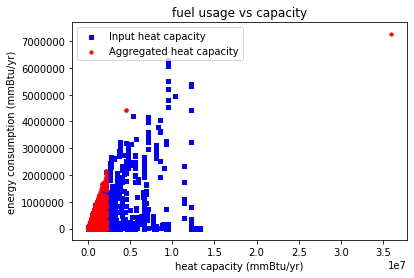

In [35]:
#plot overall fuel usage and capacity
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(f17_overall['IND_UNIT_HEAT_INPUT_CAPACITY'][f17_overall['IND_UNIT_HEAT_INPUT_CAPACITY'] != 0]*365.25*24, f17_overall['ENERGY_COM'][f17_overall['IND_UNIT_HEAT_INPUT_CAPACITY'] != 0], s=10, c='b', marker="s", label='Input heat capacity')
ax1.scatter(f17_overall['AGGR_HIGH_HEAT_CAPACITY'][f17_overall['AGGR_HIGH_HEAT_CAPACITY'] != 0]*365.25*24, f17_overall['ENERGY_COM'][f17_overall['AGGR_HIGH_HEAT_CAPACITY'] != 0], s=10, c='r', marker="o", label='Aggregated heat capacity')

plt.legend(loc='upper left')
plt.xlabel('heat capacity (mmBtu/yr)')
plt.ylabel('energy consumption (mmBtu/yr)')
plt.title('fuel usage vs capacity')
plt.show()